In [25]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

# For power quantification diagnostic
from gbspy.surfaces import get_line

# Get the current working directory|
cwd = os.getcwd()

In [26]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT 0.3 </b></span><br>
</div>

In [27]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p3')
#os.chdir('/scratch/project_465000814/kyungtak/GBS_DN_Tria/DPT_d0p3')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_d0p3 = s.Psi
ixxpt_PT_d0p3 = s.ixxpt
iyxpt_PT_d0p3 = s.iyxpt
iy0_PT_d0p3 = s.iy0
ix0_PT_d0p3 = s.ix0

t_final = s.time[-1]
t_init = t_final - 5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p3 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_d0p3 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DPT_d0p3 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_d0p3_avg = np.mean(vpare_DPT_d0p3, axis=(2,3))
Te_DPT_d0p3 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_d0p3_avg  = np.mean(dens_DPT_d0p3, axis=(2,3)); dens_DPT_d0p3_avg_tor = np.mean(dens_DPT_d0p3, axis=2)
dens_DPT_d0p3_fluct   = np.sqrt((dens_DPT_d0p3[:,:,0,:]-dens_DPT_d0p3_avg_tor)**2) / dens_DPT_d0p3_avg_tor
dens_DPT_d0p3_fluct_avg = np.mean(dens_DPT_d0p3_fluct, axis=2)

phi_DPT_d0p3_avg  = np.mean(phi_DPT_d0p3, axis=(2,3)); phi_DPT_d0p3_avg_tor = np.mean(phi_DPT_d0p3, axis=2)
phi_DPT_d0p3_fluct   = np.sqrt((phi_DPT_d0p3[:,:,0,:]-phi_DPT_d0p3_avg_tor)**2) / phi_DPT_d0p3_avg_tor
phi_DPT_d0p3_fluct_avg = np.mean(phi_DPT_d0p3_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_d0p3 = (5/2) * np.mean(vpare_DPT_d0p3 * Te_DPT_d0p3 * dens_DPT_d0p3, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [28]:
## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,220), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-184,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-220,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,184), "chi", resolution=(40,40))

# Half length
coord_xpt_UI, length_xpt_UI = get_line(s, (s.xxpt, s.yxpt), (-1,110), "chi", resolution=(40,40))
coord_xpt_UO, length_xpt_UO = get_line(s, (s.xxpt, s.yxpt), (-92,1), "chi", resolution=(40,40))
coord_xpt_LI, length_xpt_LI = get_line(s, (s.xxpt, 800-s.yxpt), (-110,1), "chi", resolution=(40,40))
coord_xpt_LO, length_xpt_LO = get_line(s, (s.xxpt, 800-s.yxpt), (-1,92), "chi", resolution=(40,40))

# Nwo Interpolation
# For DN + PT delta 0.3
UI_DPT_d0p3=(coord_xpt_UI[0][-1], coord_xpt_UI[1][-1])
UO_DPT_d0p3=(coord_xpt_UO[0][0], coord_xpt_UO[1][0])
LI_DPT_d0p3=(coord_xpt_LI[0][0], coord_xpt_LI[1][0])
LO_DPT_d0p3=(coord_xpt_LO[0][-1], coord_xpt_LO[1][-1])


coord_UI_DPT_d0p3, length_UI_DPT_d0p3 = get_line(s, UI_DPT_d0p3, (-80,80), "psi", resolution=(80,80))
coord_UO_DPT_d0p3, length_UO_DPT_d0p3 = get_line(s, UO_DPT_d0p3, (-80,80), "psi", resolution=(80,80))
coord_LI_DPT_d0p3, length_LI_DPT_d0p3 = get_line(s, LI_DPT_d0p3, (-80,80), "psi", resolution=(80,80))
coord_LO_DPT_d0p3, length_LO_DPT_d0p3 = get_line(s, LO_DPT_d0p3, (-80,80), "psi", resolution=(80,80))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_d0p3)
qpare_DPT_d0p3_UI = qpare_interpolant(coord_UI_DPT_d0p3[1,:], coord_UI_DPT_d0p3[0,:], grid=False)
qpare_DPT_d0p3_UO = qpare_interpolant(coord_UO_DPT_d0p3[1,:], coord_UO_DPT_d0p3[0,:], grid=False)
qpare_DPT_d0p3_LI = qpare_interpolant(coord_LI_DPT_d0p3[1,:], coord_LI_DPT_d0p3[0,:], grid=False)
qpare_DPT_d0p3_LO = qpare_interpolant(coord_LO_DPT_d0p3[1,:], coord_LO_DPT_d0p3[0,:], grid=False)

# Apply the function to each array
Heat_DPT_d0p3_LO = np.sum(np.abs(qpare_DPT_d0p3_LO))
Heat_DPT_d0p3_UO = np.sum(np.abs(qpare_DPT_d0p3_UO))
Heat_DPT_d0p3_LI = np.sum(np.abs(qpare_DPT_d0p3_LI))
Heat_DPT_d0p3_UI = np.sum(np.abs(qpare_DPT_d0p3_UI))

# Peak Heat Flux
Peak_DPT_d0p3_LO = np.max(np.abs(qpare_DPT_d0p3_LO))
Peak_DPT_d0p3_UO = np.max(np.abs(qpare_DPT_d0p3_UO))
Peak_DPT_d0p3_LI = np.max(np.abs(qpare_DPT_d0p3_LI))
Peak_DPT_d0p3_UI = np.max(np.abs(qpare_DPT_d0p3_UI))

Heat_tot_DPT_d0p3 = Heat_DPT_d0p3_LO + Heat_DPT_d0p3_UO + Heat_DPT_d0p3_LI + Heat_DPT_d0p3_UI
Peak_tot_DPT_d0p3 = Peak_DPT_d0p3_LO + Peak_DPT_d0p3_UO + Peak_DPT_d0p3_LI + Peak_DPT_d0p3_UI

chart_tot_DPT_d0p3 = [Heat_DPT_d0p3_LO, Heat_DPT_d0p3_UO, Heat_DPT_d0p3_LI, Heat_DPT_d0p3_UI] / Heat_tot_DPT_d0p3
chart_peak_DPT_d0p3= [Peak_DPT_d0p3_LO, Peak_DPT_d0p3_UO, Peak_DPT_d0p3_LI, Peak_DPT_d0p3_UI] / Peak_tot_DPT_d0p3


In [29]:
chart_tot_DPT_d0p3 = [Heat_DPT_d0p3_LO, Heat_DPT_d0p3_UO, Heat_DPT_d0p3_LI, Heat_DPT_d0p3_UI] / Heat_tot_DPT_d0p3
chart_tot_DPT_d0p3

array([0.52105669, 0.41158123, 0.03267211, 0.03468998])

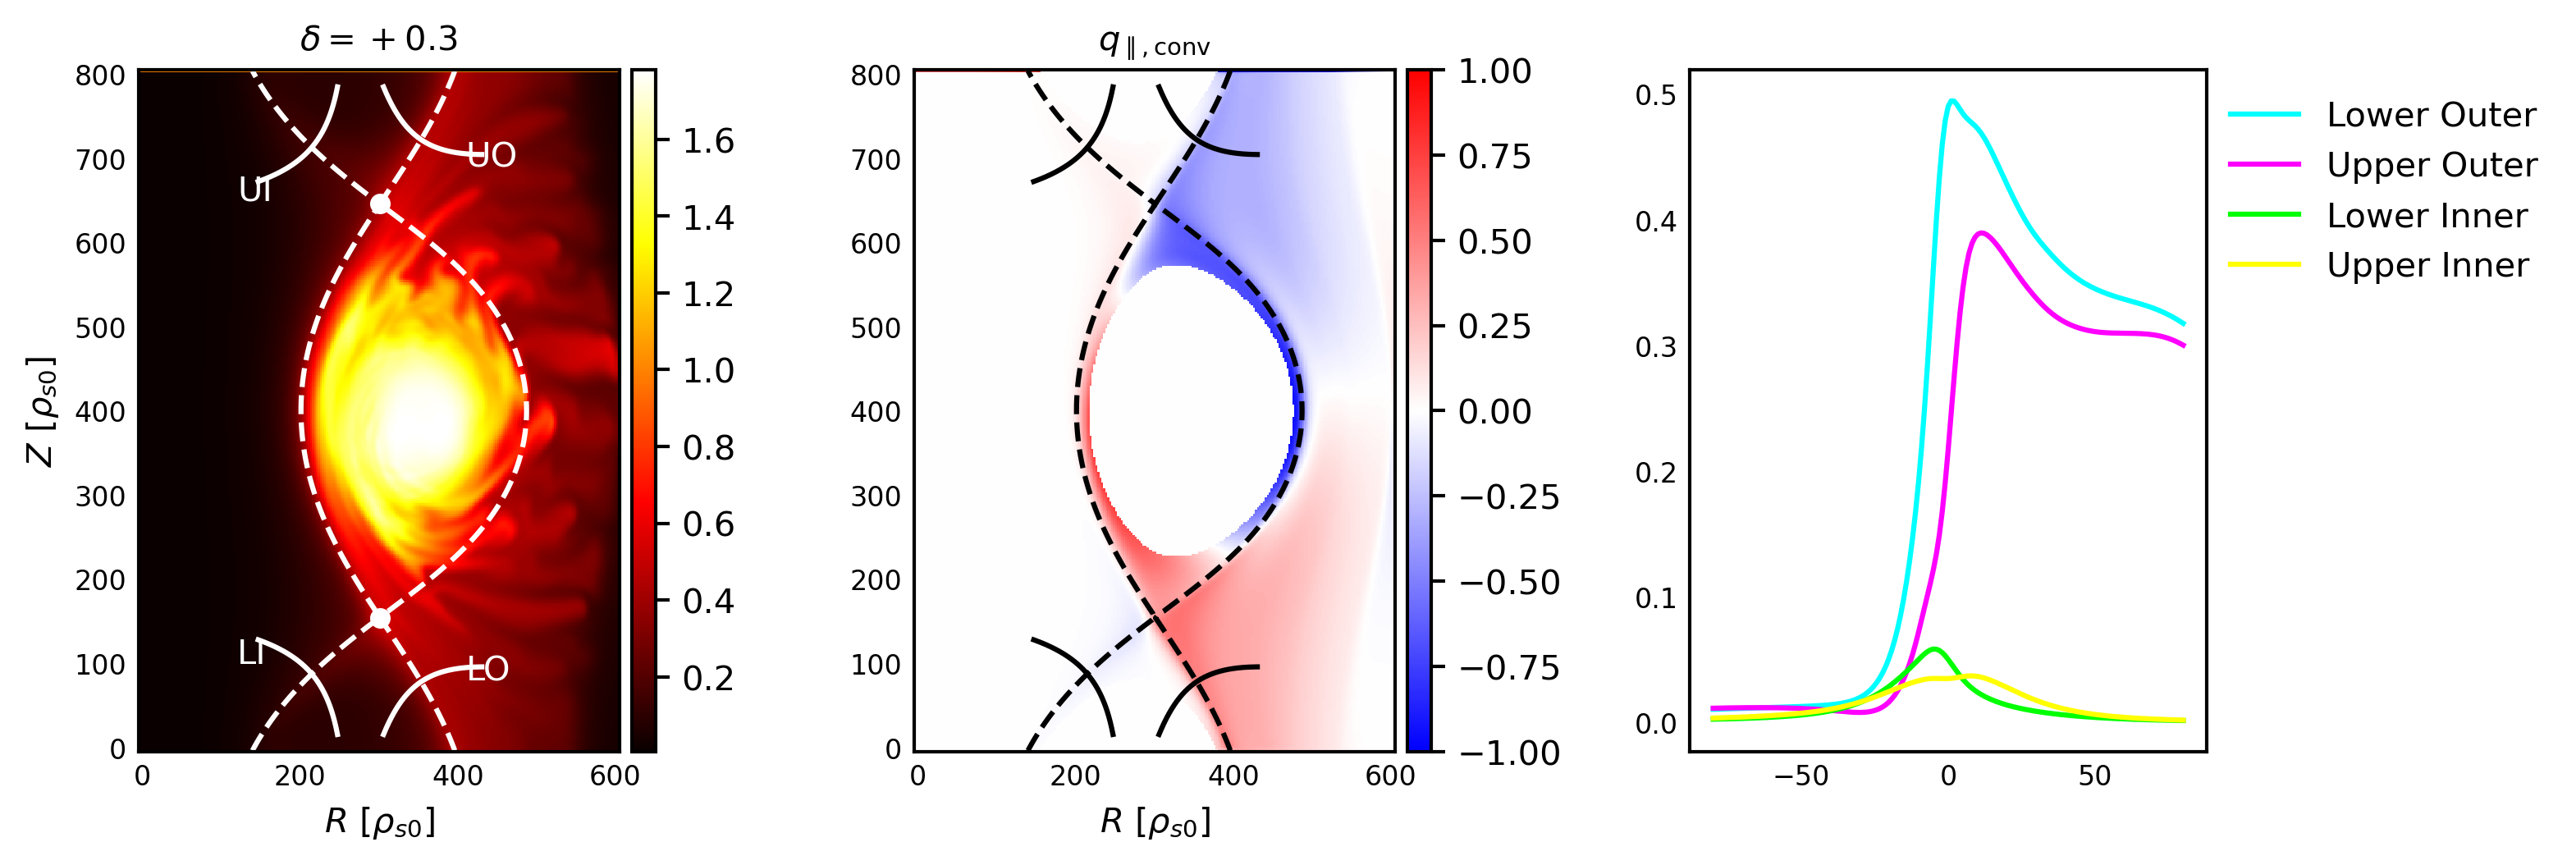

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_d0p3[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_d0p3_masked = np.copy(qpare_DPT_d0p3)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_d0p3[i,j] < Psi_PT_d0p3[iy0_PT_d0p3,ix0_PT_d0p3]+6000:
            qpare_DPT_d0p3_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_d0p3_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_d0p3)

axes[0].plot(coord_UI_DPT_d0p3[0,:], coord_UI_DPT_d0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_d0p3[0,:], coord_UO_DPT_d0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_d0p3[0,:], coord_LI_DPT_d0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_d0p3[0,:], coord_LO_DPT_d0p3[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], colors='k', linestyles='--')


axes[1].plot(coord_UI_DPT_d0p3[0,:], coord_UI_DPT_d0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_d0p3[0,:], coord_UO_DPT_d0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_d0p3[0,:], coord_LI_DPT_d0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_d0p3[0,:], coord_LO_DPT_d0p3[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_d0p3, np.abs(qpare_DPT_d0p3_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_d0p3, np.abs(qpare_DPT_d0p3_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_d0p3, np.abs(qpare_DPT_d0p3_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_d0p3, np.abs(qpare_DPT_d0p3_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(410, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 100, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(410, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 650, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.3$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_d0p3.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT 0.4 </b></span><br>
</div>

In [ ]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p4')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_d0p4 = s.Psi
ixxpt_PT_d0p4 = s.ixxpt
iyxpt_PT_d0p4 = s.iyxpt
iy0_PT_d0p4 = s.iy0
ix0_PT_d0p4 = s.ix0

t_final = s.time[-1]
t_init = t_final -10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p4 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_d0p4 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DPT_d0p4 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_d0p4_avg = np.mean(vpare_DPT_d0p4, axis=(2,3))
Te_DPT_d0p4 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_d0p4_avg  = np.mean(dens_DPT_d0p4, axis=(2,3)); dens_DPT_d0p4_avg_tor = np.mean(dens_DPT_d0p4, axis=2)
dens_DPT_d0p4_fluct   = np.sqrt((dens_DPT_d0p4[:,:,0,:]-dens_DPT_d0p4_avg_tor)**2) / dens_DPT_d0p4_avg_tor
dens_DPT_d0p4_fluct_avg = np.mean(dens_DPT_d0p4_fluct, axis=2)

phi_DPT_d0p4_avg  = np.mean(phi_DPT_d0p4, axis=(2,3)); phi_DPT_d0p4_avg_tor = np.mean(phi_DPT_d0p4, axis=2)
phi_DPT_d0p4_fluct   = np.sqrt((phi_DPT_d0p4[:,:,0,:]-phi_DPT_d0p4_avg_tor)**2) / phi_DPT_d0p4_avg_tor
phi_DPT_d0p4_fluct_avg = np.mean(phi_DPT_d0p4_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_d0p4 = (5/2) * np.mean(vpare_DPT_d0p4 * Te_DPT_d0p4 * dens_DPT_d0p4, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py:65: FutureWarning: An error has occured when reading the result index from the HDF5 contents:

Traceback (most recent call last):
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py", line 58, in _read_file_index_from_result
    with h5py.File(path, "r") as f:
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 226, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 106, in h5py.h5f.open
OSError: Unable to open file (

An error occured when opening /marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p4/results_51.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


In [ ]:
## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,220), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-184,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-220,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,184), "chi", resolution=(40,40))

# Half length
coord_xpt_UI, length_xpt_UI = get_line(s, (s.xxpt, s.yxpt), (-1,110), "chi", resolution=(40,40))
coord_xpt_UO, length_xpt_UO = get_line(s, (s.xxpt, s.yxpt), (-92,1), "chi", resolution=(40,40))
coord_xpt_LI, length_xpt_LI = get_line(s, (s.xxpt, 800-s.yxpt), (-110,1), "chi", resolution=(40,40))
coord_xpt_LO, length_xpt_LO = get_line(s, (s.xxpt, 800-s.yxpt), (-1,92), "chi", resolution=(40,40))

# Nwo Interpolation
# For DN + PT delta 0.3
UI_DPT_d0p4=(coord_xpt_UI[0][-1], coord_xpt_UI[1][-1])
UO_DPT_d0p4=(coord_xpt_UO[0][0], coord_xpt_UO[1][0])
LI_DPT_d0p4=(coord_xpt_LI[0][0], coord_xpt_LI[1][0])
LO_DPT_d0p4=(coord_xpt_LO[0][-1], coord_xpt_LO[1][-1])


coord_UI_DPT_d0p4, length_UI_DPT_d0p4 = get_line(s, UI_DPT_d0p4, (-80,80), "psi", resolution=(80,80))
coord_UO_DPT_d0p4, length_UO_DPT_d0p4 = get_line(s, UO_DPT_d0p4, (-80,80), "psi", resolution=(80,80))
coord_LI_DPT_d0p4, length_LI_DPT_d0p4 = get_line(s, LI_DPT_d0p4, (-80,80), "psi", resolution=(80,80))
coord_LO_DPT_d0p4, length_LO_DPT_d0p4 = get_line(s, LO_DPT_d0p4, (-80,80), "psi", resolution=(80,80))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_d0p4)
qpare_DPT_d0p4_UI = qpare_interpolant(coord_UI_DPT_d0p4[1,:], coord_UI_DPT_d0p4[0,:], grid=False)
qpare_DPT_d0p4_UO = qpare_interpolant(coord_UO_DPT_d0p4[1,:], coord_UO_DPT_d0p4[0,:], grid=False)
qpare_DPT_d0p4_LI = qpare_interpolant(coord_LI_DPT_d0p4[1,:], coord_LI_DPT_d0p4[0,:], grid=False)
qpare_DPT_d0p4_LO = qpare_interpolant(coord_LO_DPT_d0p4[1,:], coord_LO_DPT_d0p4[0,:], grid=False)

# Apply the function to each array
Heat_DPT_d0p4_LO = np.sum(np.abs(qpare_DPT_d0p4_LO))
Heat_DPT_d0p4_UO = np.sum(np.abs(qpare_DPT_d0p4_UO))
Heat_DPT_d0p4_LI = np.sum(np.abs(qpare_DPT_d0p4_LI))
Heat_DPT_d0p4_UI = np.sum(np.abs(qpare_DPT_d0p4_UI))

# Peak Heat Flux
Peak_DPT_d0p4_LO = np.max(np.abs(qpare_DPT_d0p4_LO))
Peak_DPT_d0p4_UO = np.max(np.abs(qpare_DPT_d0p4_UO))
Peak_DPT_d0p4_LI = np.max(np.abs(qpare_DPT_d0p4_LI))
Peak_DPT_d0p4_UI = np.max(np.abs(qpare_DPT_d0p4_UI))

Heat_tot_DPT_d0p4 = Heat_DPT_d0p4_LO + Heat_DPT_d0p4_UO + Heat_DPT_d0p4_LI + Heat_DPT_d0p4_UI
Peak_tot_DPT_d0p4 = Peak_DPT_d0p4_LO + Peak_DPT_d0p4_UO + Peak_DPT_d0p4_LI + Peak_DPT_d0p4_UI

chart_tot_DPT_d0p4 = [Heat_DPT_d0p4_LO, Heat_DPT_d0p4_UO, Heat_DPT_d0p4_LI, Heat_DPT_d0p4_UI] / Heat_tot_DPT_d0p4
chart_peak_DPT_d0p4= [Peak_DPT_d0p4_LO, Peak_DPT_d0p4_UO, Peak_DPT_d0p4_LI, Peak_DPT_d0p4_UI] / Peak_tot_DPT_d0p4

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

#cs0=axes[0].pcolormesh(X, Y, dens_DPT_d0p4[:,:,0,-1], cmap='hot', rasterized=True)
cs0=axes[0].pcolormesh(X, Y, dens_DPT_d0p4_avg, cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_d0p4_masked = np.copy(qpare_DPT_d0p4)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_d0p4[i,j] < Psi_PT_d0p4[iy0_PT_d0p4,ix0_PT_d0p4]+6000:
            qpare_DPT_d0p4_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_d0p4_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_d0p4)

axes[0].plot(coord_UI_DPT_d0p4[0,:], coord_UI_DPT_d0p4[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_d0p4[0,:], coord_UO_DPT_d0p4[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_d0p4[0,:], coord_LI_DPT_d0p4[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_d0p4[0,:], coord_LO_DPT_d0p4[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_d0p4, levels=[Psi_PT_d0p4[iyxpt_PT_d0p4, ixxpt_PT_d0p4]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_d0p4, levels=[Psi_PT_d0p4[iyxpt_PT_d0p4, ixxpt_PT_d0p4]], colors='k', linestyles='--')

axes[0].plot(coord_xpt_UI[0,:], coord_xpt_UI[1,:], c='yellow')
axes[0].plot(coord_xpt_UO[0,:], coord_xpt_UO[1,:], c='m')
axes[0].plot(coord_xpt_LI[0,:], coord_xpt_LI[1,:], c='lime')
axes[0].plot(coord_xpt_LO[0,:], coord_xpt_LO[1,:], c='cyan')

axes[1].plot(coord_UI_DPT_d0p4[0,:], coord_UI_DPT_d0p4[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_d0p4[0,:], coord_UO_DPT_d0p4[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_d0p4[0,:], coord_LI_DPT_d0p4[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_d0p4[0,:], coord_LO_DPT_d0p4[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_d0p4, np.abs(qpare_DPT_d0p4_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_d0p4, np.abs(qpare_DPT_d0p4_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_d0p4, np.abs(qpare_DPT_d0p4_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_d0p4, np.abs(qpare_DPT_d0p4_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(410, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 100, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(410, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 650, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.4$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_d0p4.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT 0.6 </b></span><br>
</div>

In [34]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p6')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_d0p6 = s.Psi
ixxpt_PT_d0p6 = s.ixxpt
iyxpt_PT_d0p6 = s.iyxpt
iy0_PT_d0p6 = s.iy0
ix0_PT_d0p6 = s.ix0

from gbspy.surfaces import get_line

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_d0p6 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DPT_d0p6 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_d0p6_avg = np.mean(vpare_DPT_d0p6, axis=(2,3))
Te_DPT_d0p6 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_d0p6_avg  = np.mean(dens_DPT_d0p6, axis=(2,3)); dens_DPT_d0p6_avg_tor = np.mean(dens_DPT_d0p6, axis=2)
dens_DPT_d0p6_fluct   = np.sqrt((dens_DPT_d0p6[:,:,0,:]-dens_DPT_d0p6_avg_tor)**2) / dens_DPT_d0p6_avg_tor
dens_DPT_d0p6_fluct_avg = np.mean(dens_DPT_d0p6_fluct, axis=2)

phi_DPT_d0p6_avg  = np.mean(phi_DPT_d0p6, axis=(2,3)); phi_DPT_d0p6_avg_tor = np.mean(phi_DPT_d0p6, axis=2)
phi_DPT_d0p6_fluct   = np.sqrt((phi_DPT_d0p6[:,:,0,:]-phi_DPT_d0p6_avg_tor)**2) / phi_DPT_d0p6_avg_tor
phi_DPT_d0p6_fluct_avg = np.mean(phi_DPT_d0p6_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_d0p6 = (5/2) * np.mean(vpare_DPT_d0p6 * Te_DPT_d0p6 * dens_DPT_d0p6, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [35]:
from gbspy.surfaces import get_line
# For balanced DN
UI_DPT_d0p6=(158.85261121620908, 709.7637771419237)
UO_DPT_d0p6=(305.110743051502, 721.353638088224)
LI_DPT_d0p6=(158.85475695604873, 90.23778669576583)
LO_DPT_d0p6=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_d0p6, length_UI_DPT_d0p6 = get_line(s, UI_DPT_d0p6, (-80,80), "psi", resolution=(80,80))
coord_UO_DPT_d0p6, length_UO_DPT_d0p6 = get_line(s, UO_DPT_d0p6, (-80,80), "psi", resolution=(80,80))
coord_LI_DPT_d0p6, length_LI_DPT_d0p6 = get_line(s, LI_DPT_d0p6, (-80,80), "psi", resolution=(80,80))
coord_LO_DPT_d0p6, length_LO_DPT_d0p6 = get_line(s, LO_DPT_d0p6, (-80,80), "psi", resolution=(80,80))

## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,170), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-250,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-170,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,250), "chi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-125,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,125), "chi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_d0p6)
qpare_DPT_d0p6_UI = qpare_interpolant(coord_UI_DPT_d0p6[1,:], coord_UI_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_UO = qpare_interpolant(coord_UO_DPT_d0p6[1,:], coord_UO_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_LI = qpare_interpolant(coord_LI_DPT_d0p6[1,:], coord_LI_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_LO = qpare_interpolant(coord_LO_DPT_d0p6[1,:], coord_LO_DPT_d0p6[0,:], grid=False)

# Apply the function to each array
Heat_DPT_d0p6_LO = np.sum(np.abs(qpare_DPT_d0p6_LO))
Heat_DPT_d0p6_UO = np.sum(np.abs(qpare_DPT_d0p6_UO))
Heat_DPT_d0p6_LI = np.sum(np.abs(qpare_DPT_d0p6_LI))
Heat_DPT_d0p6_UI = np.sum(np.abs(qpare_DPT_d0p6_UI))

# Peak Heat Flux
Peak_DPT_d0p6_LO = np.max(np.abs(qpare_DPT_d0p6_LO))
Peak_DPT_d0p6_UO = np.max(np.abs(qpare_DPT_d0p6_UO))
Peak_DPT_d0p6_LI = np.max(np.abs(qpare_DPT_d0p6_LI))
Peak_DPT_d0p6_UI = np.max(np.abs(qpare_DPT_d0p6_UI))


Heat_tot_DPT_d0p6 = Heat_DPT_d0p6_LO + Heat_DPT_d0p6_UO + Heat_DPT_d0p6_LI + Heat_DPT_d0p6_UI
Peak_tot_DPT_d0p6 = Peak_DPT_d0p6_LO + Peak_DPT_d0p6_UO + Peak_DPT_d0p6_LI + Peak_DPT_d0p6_UI

chart_tot_DPT_d0p6 = [Heat_DPT_d0p6_LO, Heat_DPT_d0p6_UO, Heat_DPT_d0p6_LI, Heat_DPT_d0p6_UI] / Heat_tot_DPT_d0p6
chart_peak_DPT_d0p6= [Peak_DPT_d0p6_LO, Peak_DPT_d0p6_UO, Peak_DPT_d0p6_LI, Peak_DPT_d0p6_UI] / Peak_tot_DPT_d0p6

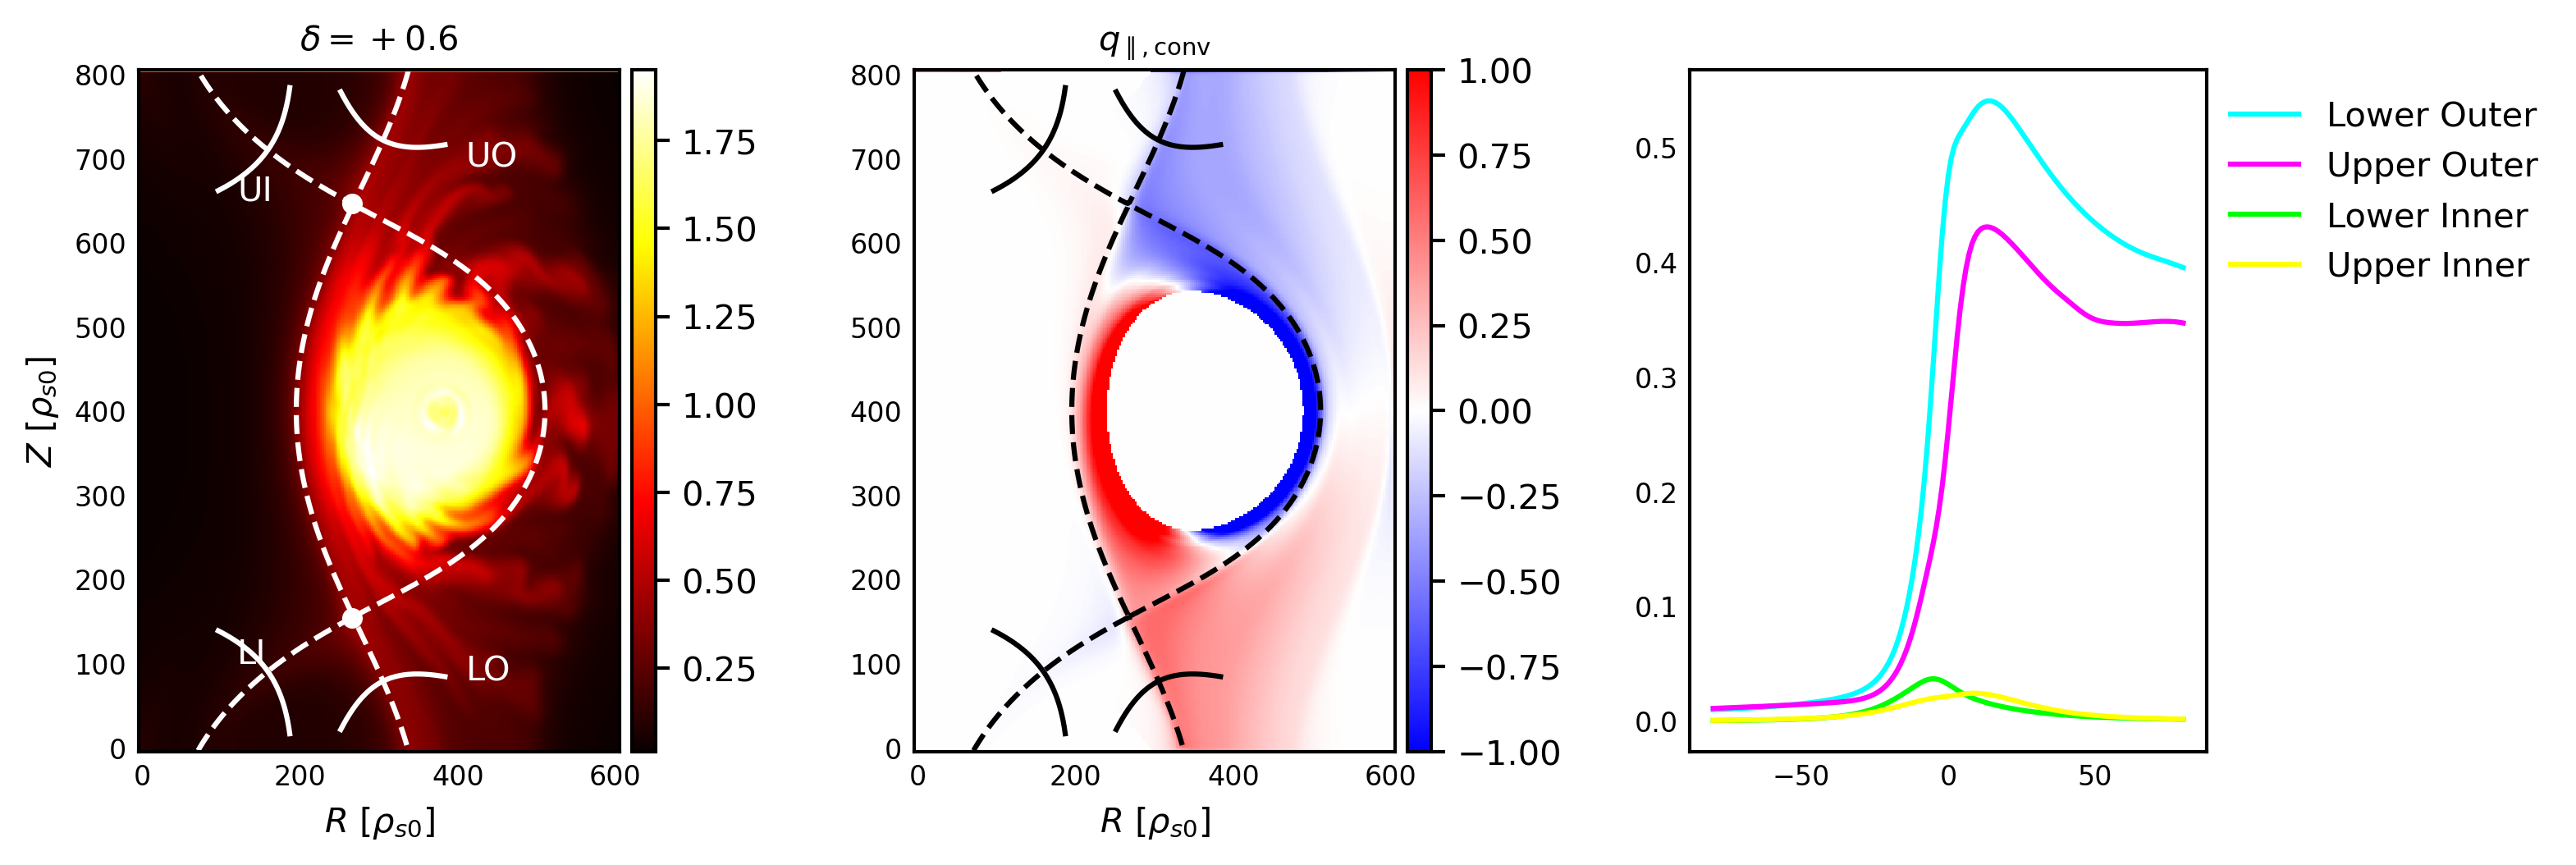

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_d0p6[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_d0p6_masked = np.copy(qpare_DPT_d0p6)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_d0p6[i,j] < Psi_PT_d0p6[iy0_PT_d0p6,ix0_PT_d0p6]+6000:
            qpare_DPT_d0p6_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_d0p6_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_d0p6)

axes[0].plot(coord_UI_DPT_d0p6[0,:], coord_UI_DPT_d0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_d0p6[0,:], coord_UO_DPT_d0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_d0p6[0,:], coord_LI_DPT_d0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_d0p6[0,:], coord_LO_DPT_d0p6[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DPT_d0p6[0,:], coord_UI_DPT_d0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_d0p6[0,:], coord_UO_DPT_d0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_d0p6[0,:], coord_LI_DPT_d0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_d0p6[0,:], coord_LO_DPT_d0p6[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_d0p6, np.abs(qpare_DPT_d0p6_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_d0p6, np.abs(qpare_DPT_d0p6_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_d0p6, np.abs(qpare_DPT_d0p6_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_d0p6, np.abs(qpare_DPT_d0p6_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(410, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 100, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(410, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 650, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_d0p6.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Now, Negative Triangularity (NT) </b></span><br>
</div>

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT $\delta=-0.3$ </b></span><br>
</div>

In [96]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p3')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_NT_dn0p3 = s.Psi
ixxpt_NT_dn0p3 = s.ixxpt
iyxpt_NT_dn0p3 = s.iyxpt
iy0_NT_dn0p3 = s.iy0
ix0_NT_dn0p3 = s.ix0

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p3 = s.get_field('n', t1=t_init, t2=t_final)
phi_DNT_dn0p3 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_dn0p3 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DNT_dn0p3_avg = np.mean(vpare_DNT_dn0p3, axis=(2,3))
Te_DNT_dn0p3 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DNT_dn0p3_avg  = np.mean(dens_DNT_dn0p3, axis=(2,3)); dens_DNT_dn0p3_avg_tor = np.mean(dens_DNT_dn0p3, axis=2)
dens_DNT_dn0p3_fluct   = np.sqrt((dens_DNT_dn0p3[:,:,0,:]-dens_DNT_dn0p3_avg_tor)**2) / dens_DNT_dn0p3_avg_tor
dens_DNT_dn0p3_fluct_avg = np.mean(dens_DNT_dn0p3_fluct, axis=2)

phi_DNT_dn0p3_avg  = np.mean(phi_DNT_dn0p3, axis=(2,3)); phi_DNT_dn0p3_avg_tor = np.mean(phi_DNT_dn0p3, axis=2)
phi_DNT_dn0p3_fluct   = np.sqrt((phi_DNT_dn0p3[:,:,0,:]-phi_DNT_dn0p3_avg_tor)**2) / phi_DNT_dn0p3_avg_tor
phi_DNT_dn0p3_fluct_avg = np.mean(phi_DNT_dn0p3_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_dn0p3 = (5/2) * np.mean(vpare_DNT_dn0p3 * Te_DNT_dn0p3 * dens_DNT_dn0p3, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py:65: FutureWarning: An error has occured when reading the result index from the HDF5 contents:

Traceback (most recent call last):
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py", line 58, in _read_file_index_from_result
    with h5py.File(path, "r") as f:
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 226, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 106, in h5py.h5f.open
OSError: Unable to open file (

An error occured when opening /marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p3/results_67.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


In [97]:
from gbspy.surfaces import get_line


## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,220), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-184,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-220,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,184), "chi", resolution=(40,40))

# Half length
coord_xpt_UI, length_xpt_UI = get_line(s, (s.xxpt, s.yxpt), (-1,110), "chi", resolution=(40,40))
coord_xpt_UO, length_xpt_UO = get_line(s, (s.xxpt, s.yxpt), (-92,1), "chi", resolution=(40,40))
coord_xpt_LI, length_xpt_LI = get_line(s, (s.xxpt, 800-s.yxpt), (-110,1), "chi", resolution=(40,40))
coord_xpt_LO, length_xpt_LO = get_line(s, (s.xxpt, 800-s.yxpt), (-1,92), "chi", resolution=(40,40))

# Nwo Interpolation
# For DN + PT delta 0.3
UI_DNT_dn0p3=(coord_xpt_UI[0][-1], coord_xpt_UI[1][-1])
UO_DNT_dn0p3=(coord_xpt_UO[0][0], coord_xpt_UO[1][0])
LI_DNT_dn0p3=(coord_xpt_LI[0][0], coord_xpt_LI[1][0])
LO_DNT_dn0p3=(coord_xpt_LO[0][-1], coord_xpt_LO[1][-1])


coord_UI_DNT_dn0p3, length_UI_DNT_dn0p3 = get_line(s, UI_DNT_dn0p3, (-80,80), "psi", resolution=(80,80))
coord_UO_DNT_dn0p3, length_UO_DNT_dn0p3 = get_line(s, UO_DNT_dn0p3, (-80,80), "psi", resolution=(80,80))
coord_LI_DNT_dn0p3, length_LI_DNT_dn0p3 = get_line(s, LI_DNT_dn0p3, (-80,80), "psi", resolution=(80,80))
coord_LO_DNT_dn0p3, length_LO_DNT_dn0p3 = get_line(s, LO_DNT_dn0p3, (-80,80), "psi", resolution=(80,80))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_dn0p3)
qpare_DNT_dn0p3_UI = qpare_interpolant(coord_UI_DNT_dn0p3[1,:], coord_UI_DNT_dn0p3[0,:], grid=False)
qpare_DNT_dn0p3_UO = qpare_interpolant(coord_UO_DNT_dn0p3[1,:], coord_UO_DNT_dn0p3[0,:], grid=False)
qpare_DNT_dn0p3_LI = qpare_interpolant(coord_LI_DNT_dn0p3[1,:], coord_LI_DNT_dn0p3[0,:], grid=False)
qpare_DNT_dn0p3_LO = qpare_interpolant(coord_LO_DNT_dn0p3[1,:], coord_LO_DNT_dn0p3[0,:], grid=False)

# Apply the function to each array
Heat_DNT_dn0p3_LO = np.sum(np.abs(qpare_DNT_dn0p3_LO))
Heat_DNT_dn0p3_UO = np.sum(np.abs(qpare_DNT_dn0p3_UO))
Heat_DNT_dn0p3_LI = np.sum(np.abs(qpare_DNT_dn0p3_LI))
Heat_DNT_dn0p3_UI = np.sum(np.abs(qpare_DNT_dn0p3_UI))

# Peak Heat Flux
Peak_DNT_dn0p3_LO = np.max(np.abs(qpare_DNT_dn0p3_LO))
Peak_DNT_dn0p3_UO = np.max(np.abs(qpare_DNT_dn0p3_UO))
Peak_DNT_dn0p3_LI = np.max(np.abs(qpare_DNT_dn0p3_LI))
Peak_DNT_dn0p3_UI = np.max(np.abs(qpare_DNT_dn0p3_UI))

Heat_tot_DNT_dn0p3 = Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_UO + Heat_DNT_dn0p3_LI + Heat_DNT_dn0p3_UI
Peak_tot_DNT_dn0p3 = Peak_DNT_dn0p3_LO + Peak_DNT_dn0p3_UO + Peak_DNT_dn0p3_LI + Peak_DNT_dn0p3_UI

chart_tot_DNT_dn0p3 = [Heat_DNT_dn0p3_LO, Heat_DNT_dn0p3_UO, Heat_DNT_dn0p3_LI, Heat_DNT_dn0p3_UI] / Heat_tot_DNT_dn0p3
chart_peak_DNT_dn0p3= [Peak_DNT_dn0p3_LO, Peak_DNT_dn0p3_UO, Peak_DNT_dn0p3_LI, Peak_DNT_dn0p3_UI] / Peak_tot_DNT_dn0p3

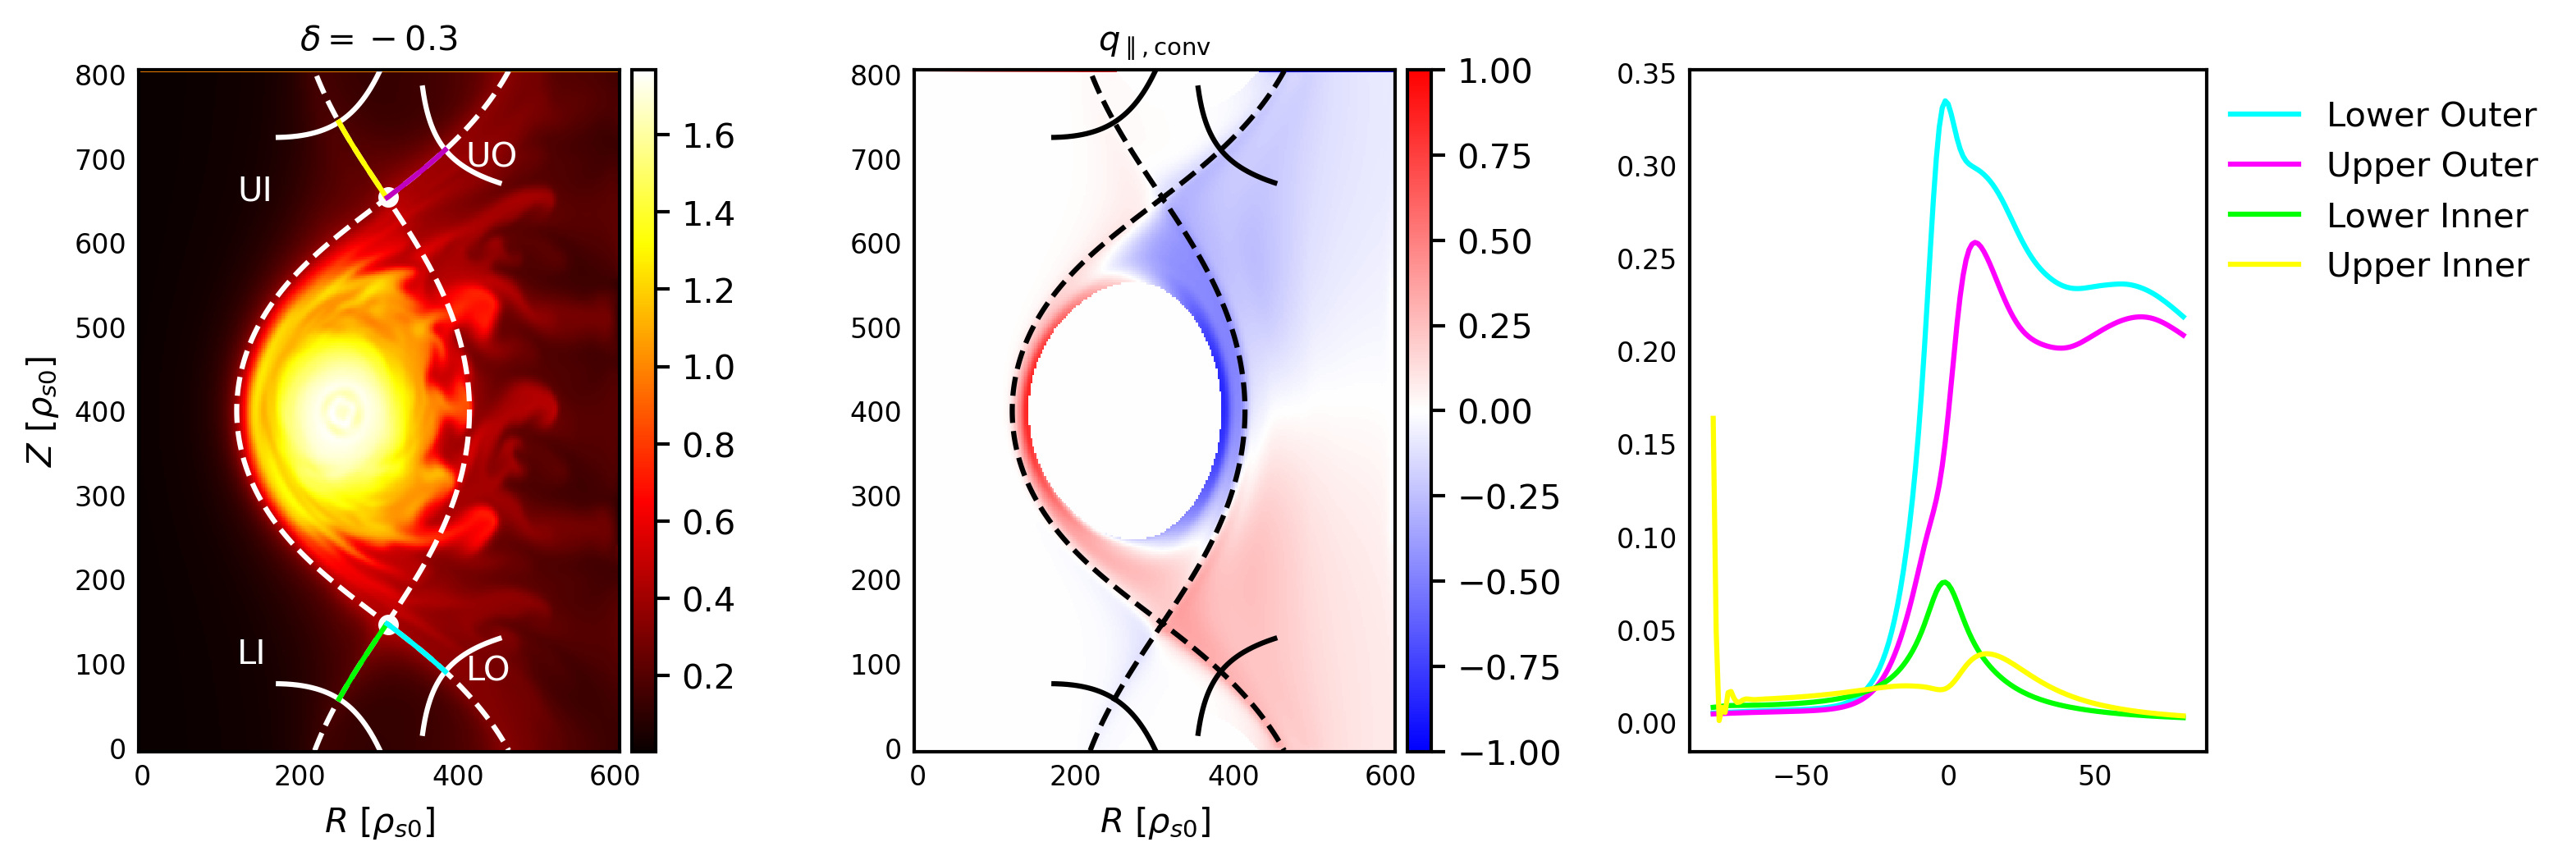

In [98]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_dn0p3[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_dn0p3_masked = np.copy(qpare_DNT_dn0p3)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_dn0p3[i,j] < Psi_NT_dn0p3[iy0_NT_dn0p3,ix0_NT_dn0p3]+6000:
            qpare_DNT_dn0p3_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_dn0p3_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_dn0p3)

axes[0].plot(coord_UI_DNT_dn0p3[0,:], coord_UI_DNT_dn0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_dn0p3[0,:], coord_UO_DNT_dn0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_dn0p3[0,:], coord_LI_DNT_dn0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_dn0p3[0,:], coord_LO_DNT_dn0p3[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_dn0p3, levels=[Psi_NT_dn0p3[iyxpt_NT_dn0p3, ixxpt_NT_dn0p3]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_dn0p3, levels=[Psi_NT_dn0p3[iyxpt_NT_dn0p3, ixxpt_NT_dn0p3]], colors='k', linestyles='--')

axes[0].plot(coord_xpt_UI[0,:], coord_xpt_UI[1,:], c='yellow')
axes[0].plot(coord_xpt_UO[0,:], coord_xpt_UO[1,:], c='m')
axes[0].plot(coord_xpt_LI[0,:], coord_xpt_LI[1,:], c='lime')
axes[0].plot(coord_xpt_LO[0,:], coord_xpt_LO[1,:], c='cyan')

axes[1].plot(coord_UI_DNT_dn0p3[0,:], coord_UI_DNT_dn0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_dn0p3[0,:], coord_UO_DNT_dn0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_dn0p3[0,:], coord_LI_DNT_dn0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_dn0p3[0,:], coord_LO_DNT_dn0p3[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_dn0p3, np.abs(qpare_DNT_dn0p3_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_dn0p3, np.abs(qpare_DNT_dn0p3_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_dn0p3, np.abs(qpare_DNT_dn0p3_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_dn0p3, np.abs(qpare_DNT_dn0p3_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(410, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 100, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(410, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 650, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.3$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_dn0p3.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT $\delta=-0.4$ </b></span><br>
</div>

In [165]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p4')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_NT_dn0p4 = s.Psi
ixxpt_NT_dn0p4 = s.ixxpt
iyxpt_NT_dn0p4 = s.iyxpt
iy0_NT_dn0p4 = s.iy0
ix0_NT_dn0p4 = s.ix0

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p4 = s.get_field('n', t1=t_init, t2=t_final)
phi_DNT_dn0p4 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_dn0p4 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DNT_dn0p4_avg = np.mean(vpare_DNT_dn0p4, axis=(2,3))
Te_DNT_dn0p4 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DNT_dn0p4_avg  = np.mean(dens_DNT_dn0p4, axis=(2,3)); dens_DNT_dn0p4_avg_tor = np.mean(dens_DNT_dn0p4, axis=2)
dens_DNT_dn0p4_fluct   = np.sqrt((dens_DNT_dn0p4[:,:,0,:]-dens_DNT_dn0p4_avg_tor)**2) / dens_DNT_dn0p4_avg_tor
dens_DNT_dn0p4_fluct_avg = np.mean(dens_DNT_dn0p4_fluct, axis=2)

phi_DNT_dn0p4_avg  = np.mean(phi_DNT_dn0p4, axis=(2,3)); phi_DNT_dn0p4_avg_tor = np.mean(phi_DNT_dn0p4, axis=2)
phi_DNT_dn0p4_fluct   = np.sqrt((phi_DNT_dn0p4[:,:,0,:]-phi_DNT_dn0p4_avg_tor)**2) / phi_DNT_dn0p4_avg_tor
phi_DNT_dn0p4_fluct_avg = np.mean(phi_DNT_dn0p4_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_dn0p4 = (5/2) * np.mean(vpare_DNT_dn0p4 * Te_DNT_dn0p4 * dens_DNT_dn0p4, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [166]:
## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,220), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-184,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-220,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,184), "chi", resolution=(40,40))

# Half length
coord_xpt_LO, length_xpt_LO = get_line(s, (s.xxpt, s.yxpt), (-1,110), "chi", resolution=(40,40))
coord_xpt_UO, length_xpt_UO = get_line(s, (s.xxpt, s.yxpt), (-92,1), "chi", resolution=(40,40))
coord_xpt_LI, length_xpt_LI = get_line(s, (s.xxpt, 800-s.yxpt), (-110,1), "chi", resolution=(40,40))
coord_xpt_UI, length_xpt_UI = get_line(s, (s.xxpt, 800-s.yxpt), (-1,92), "chi", resolution=(40,40))

# Nwo Interpolation
# For DN + PT delta 0.3
UI_DNT_dn0p4=(coord_xpt_UI[0][-1], coord_xpt_UI[1][-1])
UO_DNT_dn0p4=(coord_xpt_UO[0][0], coord_xpt_UO[1][0])
LI_DNT_dn0p4=(coord_xpt_LI[0][0], coord_xpt_LI[1][0])
LO_DNT_dn0p4=(coord_xpt_LO[0][-1], coord_xpt_LO[1][-1])


coord_UI_DNT_dn0p4, length_UI_DNT_dn0p4 = get_line(s, UI_DNT_dn0p4, (-70,70), "psi", resolution=(70,70))
coord_LI_DNT_dn0p4, length_LI_DNT_dn0p4 = get_line(s, UO_DNT_dn0p4, (-70,70), "psi", resolution=(70,70))
coord_UO_DNT_dn0p4, length_UO_DNT_dn0p4 = get_line(s, LI_DNT_dn0p4, (-70,70), "psi", resolution=(70,70))
coord_LO_DNT_dn0p4, length_LO_DNT_dn0p4 = get_line(s, LO_DNT_dn0p4, (-70,70), "psi", resolution=(70,70))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_dn0p4)
qpare_DNT_dn0p4_UI = qpare_interpolant(coord_UI_DNT_dn0p4[1,:], coord_UI_DNT_dn0p4[0,:], grid=False)
qpare_DNT_dn0p4_UO = qpare_interpolant(coord_UO_DNT_dn0p4[1,:], coord_UO_DNT_dn0p4[0,:], grid=False)
qpare_DNT_dn0p4_LI = qpare_interpolant(coord_LI_DNT_dn0p4[1,:], coord_LI_DNT_dn0p4[0,:], grid=False)
qpare_DNT_dn0p4_LO = qpare_interpolant(coord_LO_DNT_dn0p4[1,:], coord_LO_DNT_dn0p4[0,:], grid=False)

# Apply the function to each array
Heat_DNT_dn0p4_LO = np.sum(np.abs(qpare_DNT_dn0p4_LO))
Heat_DNT_dn0p4_UO = np.sum(np.abs(qpare_DNT_dn0p4_UO))
Heat_DNT_dn0p4_LI = np.sum(np.abs(qpare_DNT_dn0p4_LI))
Heat_DNT_dn0p4_UI = np.sum(np.abs(qpare_DNT_dn0p4_UI))

# Peak Heat Flux
Peak_DNT_dn0p4_LO = np.max(np.abs(qpare_DNT_dn0p4_LO))
Peak_DNT_dn0p4_UO = np.max(np.abs(qpare_DNT_dn0p4_UO))
Peak_DNT_dn0p4_LI = np.max(np.abs(qpare_DNT_dn0p4_LI))
Peak_DNT_dn0p4_UI = np.max(np.abs(qpare_DNT_dn0p4_UI))

Heat_tot_DNT_dn0p4 = Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_UO + Heat_DNT_dn0p4_LI + Heat_DNT_dn0p4_UI
Peak_tot_DNT_dn0p4 = Peak_DNT_dn0p4_LO + Peak_DNT_dn0p4_UO + Peak_DNT_dn0p4_LI + Peak_DNT_dn0p4_UI

chart_tot_DNT_dn0p4 = [Heat_DNT_dn0p4_LO, Heat_DNT_dn0p4_UO, Heat_DNT_dn0p4_LI, Heat_DNT_dn0p4_UI] / Heat_tot_DNT_dn0p4
chart_peak_DNT_dn0p4= [Peak_DNT_dn0p4_LO, Peak_DNT_dn0p4_UO, Peak_DNT_dn0p4_LI, Peak_DNT_dn0p4_UI] / Peak_tot_DNT_dn0p4

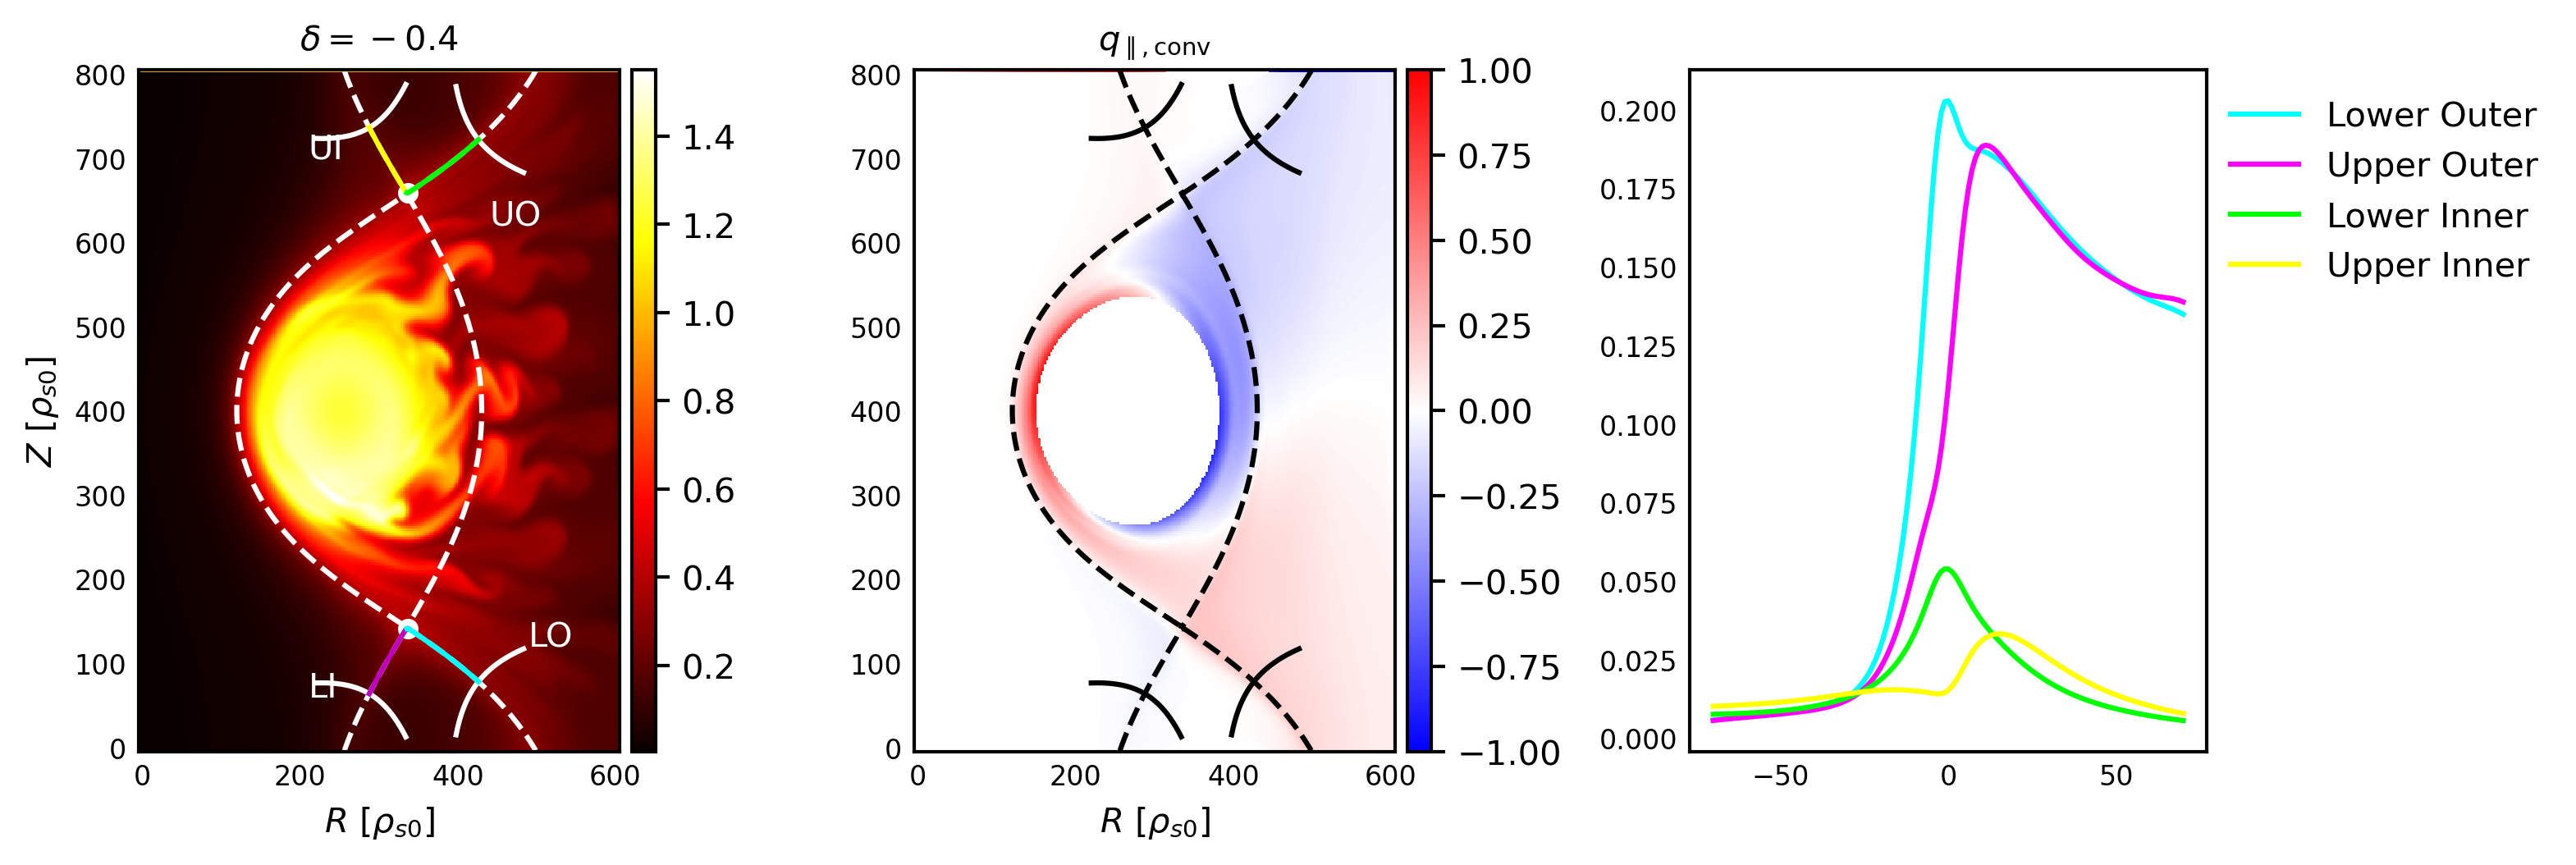

In [167]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_dn0p4[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_dn0p4_masked = np.copy(qpare_DNT_dn0p4)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_dn0p4[i,j] < Psi_NT_dn0p4[iy0_NT_dn0p4,ix0_NT_dn0p4]+6000:
            qpare_DNT_dn0p4_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_dn0p4_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_dn0p4)

axes[0].plot(coord_UI_DNT_dn0p4[0,:], coord_UI_DNT_dn0p4[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_dn0p4[0,:], coord_UO_DNT_dn0p4[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_dn0p4[0,:], coord_LI_DNT_dn0p4[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_dn0p4[0,:], coord_LO_DNT_dn0p4[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_dn0p4, levels=[Psi_NT_dn0p4[iyxpt_NT_dn0p4, ixxpt_NT_dn0p4]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_dn0p4, levels=[Psi_NT_dn0p4[iyxpt_NT_dn0p4, ixxpt_NT_dn0p4]], colors='k', linestyles='--')

axes[0].plot(coord_xpt_UI[0,:], coord_xpt_UI[1,:], c='yellow')
axes[0].plot(coord_xpt_UO[0,:], coord_xpt_UO[1,:], c='m')
axes[0].plot(coord_xpt_LI[0,:], coord_xpt_LI[1,:], c='lime')
axes[0].plot(coord_xpt_LO[0,:], coord_xpt_LO[1,:], c='cyan')

axes[1].plot(coord_UI_DNT_dn0p4[0,:], coord_UI_DNT_dn0p4[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_dn0p4[0,:], coord_UO_DNT_dn0p4[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_dn0p4[0,:], coord_LI_DNT_dn0p4[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_dn0p4[0,:], coord_LO_DNT_dn0p4[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_dn0p4, np.abs(qpare_DNT_dn0p4_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_dn0p4, np.abs(qpare_DNT_dn0p4_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_dn0p4, np.abs(qpare_DNT_dn0p4_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_dn0p4, np.abs(qpare_DNT_dn0p4_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif',color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif',  color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif',color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif',color ="w")

axes[0].set_title(r'$\delta=-0.4$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_dn0p4.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 </b></span><br>
</div>

In [43]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p6')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_dn0p6 = s.Psi
ixxpt_NT_dn0p6 = s.ixxpt
iyxpt_NT_dn0p6 = s.iyxpt
iy0_NT_dn0p6 = s.iy0
ix0_NT_dn0p6 = s.ix0

dens_DNT_dn0p6  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_dn0p6 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_dn0p6 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_dn0p6 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_dn0p6_avg = np.mean(vpare_DNT_dn0p6, axis=(2,3))

# Fluctuating quantity
dens_DNT_dn0p6_avg  = np.mean(dens_DNT_dn0p6, axis=(2,3)); dens_DNT_dn0p6_avg_tor = np.mean(dens_DNT_dn0p6, axis=2)
dens_DNT_dn0p6_fluct   = np.sqrt((dens_DNT_dn0p6[:,:,0,:]-dens_DNT_dn0p6_avg_tor)**2) / dens_DNT_dn0p6_avg_tor
dens_DNT_dn0p6_fluct_avg = np.mean(dens_DNT_dn0p6_fluct, axis=2)

phi_DNT_dn0p6_avg  = np.mean(phi_DNT_dn0p6, axis=(2,3)); phi_DNT_dn0p6_avg_tor = np.mean(phi_DNT_dn0p6, axis=2)
phi_DNT_dn0p6_fluct   = np.sqrt((phi_DNT_dn0p6[:,:,0,:]-phi_DNT_dn0p6_avg_tor)**2) / phi_DNT_dn0p6_avg_tor
phi_DNT_dn0p6_fluct_avg = np.mean(phi_DNT_dn0p6_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_dn0p6 = (5/2) * np.mean(vpare_DNT_dn0p6 * Te_DNT_dn0p6 * dens_DNT_dn0p6, axis=(2,3))

In [44]:
# For balanced DN
UO_DNT_dn0p6=(456.5503784658009, 709.075944151039)
UI_DNT_dn0p6=(310.36118514691896, 721.6963043686486)
LI_DNT_dn0p6=(310.3629879445284, 78.30729369710014)
LO_DNT_dn0p6=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_dn0p6, length_UI_DNT_dn0p6 = get_line(s, UI_DNT_dn0p6, (-80,80), "psi", resolution=(80,80))
coord_UO_DNT_dn0p6, length_UO_DNT_dn0p6 = get_line(s, UO_DNT_dn0p6, (-80,80), "psi", resolution=(80,80))
coord_LI_DNT_dn0p6, length_LI_DNT_dn0p6 = get_line(s, LI_DNT_dn0p6, (-80,80), "psi", resolution=(80,80))
coord_LO_DNT_dn0p6, length_LO_DNT_dn0p6 = get_line(s, LO_DNT_dn0p6, (-80,80), "psi", resolution=(80,80))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,125), "chi", resolution=(40,125))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-125,1), "chi", resolution=(40,40))


from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_dn0p6)
qpare_DNT_dn0p6_UI = qpare_interpolant(coord_UI_DNT_dn0p6[1,:], coord_UI_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_UO = qpare_interpolant(coord_UO_DNT_dn0p6[1,:], coord_UO_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_LI = qpare_interpolant(coord_LI_DNT_dn0p6[1,:], coord_LI_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_LO = qpare_interpolant(coord_LO_DNT_dn0p6[1,:], coord_LO_DNT_dn0p6[0,:], grid=False)


# Apply the function to each array
Heat_DNT_dn0p6_LO = np.sum(np.abs(qpare_DNT_dn0p6_LO))
Heat_DNT_dn0p6_UO = np.sum(np.abs(qpare_DNT_dn0p6_UO))
Heat_DNT_dn0p6_LI = np.sum(np.abs(qpare_DNT_dn0p6_LI))
Heat_DNT_dn0p6_UI = np.sum(np.abs(qpare_DNT_dn0p6_UI))

# Peak Heat Flux
Peak_DNT_dn0p6_LO = np.max(np.abs(qpare_DNT_dn0p6_LO))
Peak_DNT_dn0p6_UO = np.max(np.abs(qpare_DNT_dn0p6_UO))
Peak_DNT_dn0p6_LI = np.max(np.abs(qpare_DNT_dn0p6_LI))
Peak_DNT_dn0p6_UI = np.max(np.abs(qpare_DNT_dn0p6_UI))

Heat_tot_DNT_dn0p6 = Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_UO + Heat_DNT_dn0p6_LI + Heat_DNT_dn0p6_UI
Peak_tot_DNT_dn0p6 = Peak_DNT_dn0p6_LO + Peak_DNT_dn0p6_UO + Peak_DNT_dn0p6_LI + Peak_DNT_dn0p6_UI

chart_tot_DNT_dn0p6 = [Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO, Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI] / Heat_tot_DNT_dn0p6
chart_peak_DNT_dn0p6= [Peak_DNT_dn0p6_LO, Peak_DNT_dn0p6_UO, Peak_DNT_dn0p6_LI, Peak_DNT_dn0p6_UI] / Peak_tot_DNT_dn0p6

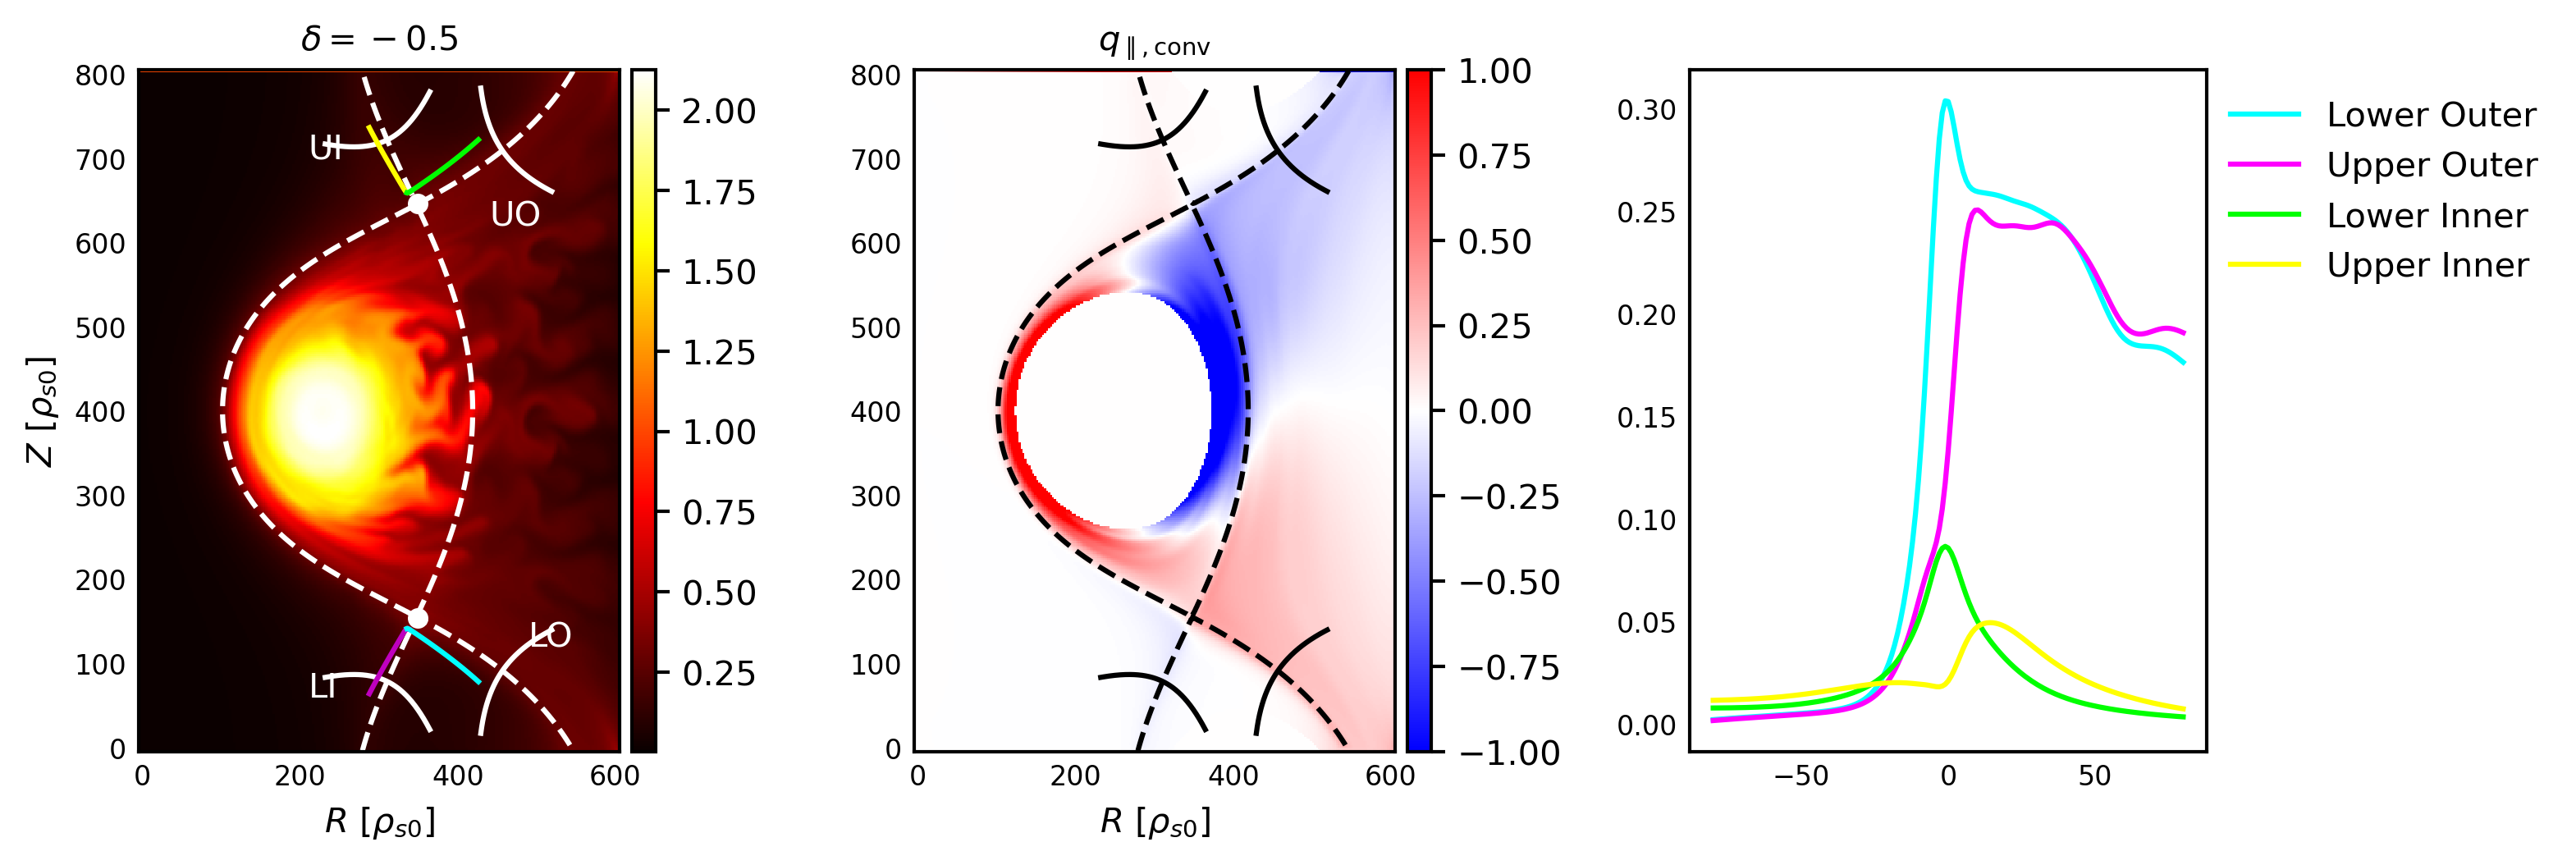

In [45]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_dn0p6[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_dn0p6_masked = np.copy(qpare_DNT_dn0p6)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_dn0p6[i,j] < Psi_NT_dn0p6[iy0_NT_dn0p6,ix0_NT_dn0p6]+6000:
            qpare_DNT_dn0p6_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_dn0p6_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_dn0p6)

axes[0].plot(coord_UI_DNT_dn0p6[0,:], coord_UI_DNT_dn0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_dn0p6[0,:], coord_UO_DNT_dn0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_dn0p6[0,:], coord_LI_DNT_dn0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_dn0p6[0,:], coord_LO_DNT_dn0p6[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_dn0p6, levels=[Psi_NT_dn0p6[iyxpt_NT_dn0p6, ixxpt_NT_dn0p6]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_dn0p6, levels=[Psi_NT_dn0p6[iyxpt_NT_dn0p6, ixxpt_NT_dn0p6]], colors='k', linestyles='--')

axes[0].plot(coord_xpt_UI[0,:], coord_xpt_UI[1,:], c='yellow')
axes[0].plot(coord_xpt_UO[0,:], coord_xpt_UO[1,:], c='m')
axes[0].plot(coord_xpt_LI[0,:], coord_xpt_LI[1,:], c='lime')
axes[0].plot(coord_xpt_LO[0,:], coord_xpt_LO[1,:], c='cyan')

axes[1].plot(coord_UI_DNT_dn0p6[0,:], coord_UI_DNT_dn0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_dn0p6[0,:], coord_UO_DNT_dn0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_dn0p6[0,:], coord_LI_DNT_dn0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_dn0p6[0,:], coord_LO_DNT_dn0p6[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.5$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_dn0p6.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> DN balanced $\delta=0$ </b></span><br>
</div>

In [151]:
os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/delta_scan/DN_no_tria')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_DN = s.Psi
ixxpt_DN = s.ixxpt
iyxpt_DN = s.iyxpt
iy0_DN = s.iy0
ix0_DN = s.ix0

dens_DN  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DN = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DN = s.get_field('Te', t1=t_init, t2=t_final)
phi_DN = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DN_avg = np.mean(vpare_DN, axis=(2,3))

# Fluctuating quantity
dens_DN_avg  = np.mean(dens_DN, axis=(2,3)); dens_DN_avg_tor = np.mean(dens_DN, axis=2)
dens_DN_fluct   = np.sqrt((dens_DN[:,:,0,:]-dens_DN_avg_tor)**2) / dens_DN_avg_tor
dens_DN_fluct_avg = np.mean(dens_DN_fluct, axis=2)

phi_DN_avg  = np.mean(phi_DN, axis=(2,3)); phi_DN_avg_tor = np.mean(phi_DN, axis=2)
phi_DN_fluct   = np.sqrt((phi_DN[:,:,0,:]-phi_DN_avg_tor)**2) / phi_DN_avg_tor
phi_DN_fluct_avg = np.mean(phi_DN_fluct, axis=2)

# Convective Heat Flux
qpare_DN = (5/2) * np.mean(vpare_DN * Te_DN * dens_DN, axis=(2,3))

In [154]:
# For balanced DN
UI_DN=(250,738)
UO_DN=(350,738)
LI_DN=(250,64)
LO_DN=(350,64)

coord_UI_DN, length_UI_DN = get_line(s, UI_DN, (-65,65), "psi", resolution=(65,65))
coord_UO_DN, length_UO_DN = get_line(s, UO_DN, (-65,65), "psi", resolution=(65,65))
coord_LI_DN, length_LI_DN = get_line(s, LI_DN, (-65,65), "psi", resolution=(65,65))
coord_LO_DN, length_LO_DN = get_line(s, LO_DN, (-65,65), "psi", resolution=(65,65))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DN)
qpare_DN_UI = qpare_interpolant(coord_UI_DN[1,:], coord_UI_DN[0,:], grid=False)
qpare_DN_UO = qpare_interpolant(coord_UO_DN[1,:], coord_UO_DN[0,:], grid=False)
qpare_DN_LI = qpare_interpolant(coord_LI_DN[1,:], coord_LI_DN[0,:], grid=False)
qpare_DN_LO = qpare_interpolant(coord_LO_DN[1,:], coord_LO_DN[0,:], grid=False)


# Apply the function to each array
Heat_DN_LO = np.sum(np.abs(qpare_DN_LO))
Heat_DN_UO = np.sum(np.abs(qpare_DN_UO))
Heat_DN_LI = np.sum(np.abs(qpare_DN_LI))
Heat_DN_UI = np.sum(np.abs(qpare_DN_UI))

# Peak Heat Flux
Peak_DN_LO = np.max(np.abs(qpare_DN_LO))
Peak_DN_UO = np.max(np.abs(qpare_DN_UO))
Peak_DN_LI = np.max(np.abs(qpare_DN_LI))
Peak_DN_UI = np.max(np.abs(qpare_DN_UI))

Heat_tot_DN = Heat_DN_LO + Heat_DN_UO + Heat_DN_LI + Heat_DN_UI
Peak_tot_DN = Peak_DN_LO + Peak_DN_UO + Peak_DN_LI + Peak_DN_UI

chart_tot_DN = [Heat_DN_LO, Heat_DN_UO, Heat_DN_LI, Heat_DN_UI] / Heat_tot_DN
chart_peak_DN= [Peak_DN_LO, Peak_DN_UO, Peak_DN_LI, Peak_DN_UI] / Peak_tot_DN

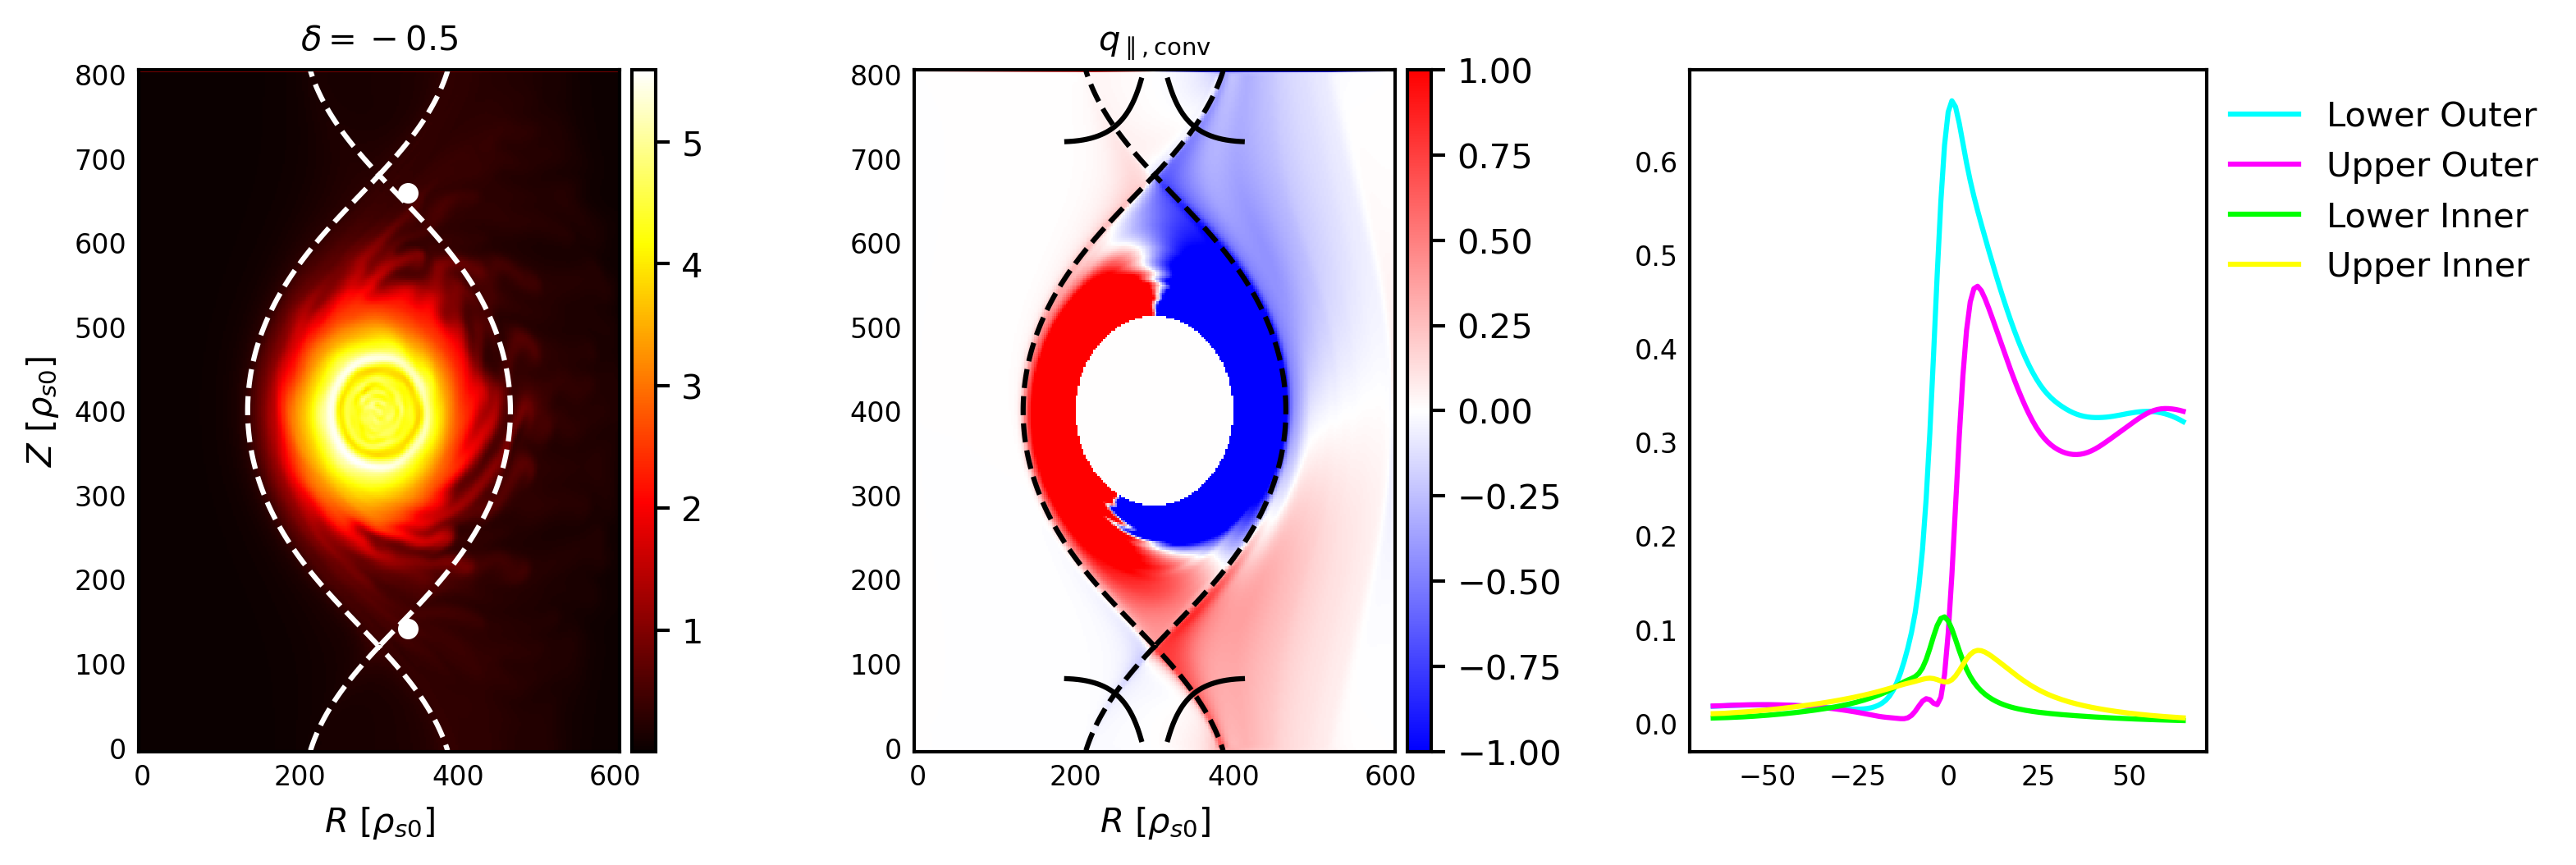

In [190]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DN[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DN_masked = np.copy(qpare_DN)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_DN[i,j] < Psi_DN[iy0_DN,ix0_DN]+6000:
            qpare_DN_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DN_masked, cmap='bwr', vmin=-1, vmax=+1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DN)

# Plot Separatrix
axes[0].contour(X, Y, Psi_DN, levels=[Psi_DN[iyxpt_DN, ixxpt_DN]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_DN, levels=[Psi_DN[iyxpt_DN, ixxpt_DN]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DN[0,:], coord_UI_DN[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DN[0,:], coord_UO_DN[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DN[0,:], coord_LI_DN[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DN[0,:], coord_LO_DN[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DN, np.abs(qpare_DN_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DN, np.abs(qpare_DN_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DN, np.abs(qpare_DN_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DN, np.abs(qpare_DN_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    

axes[0].set_title(r'$\delta=-0.5$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_dn0p6.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Now figures for the paper </b></span><br>
</div>

In [79]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Each target power distribution comparison </b></span><br>
</div>

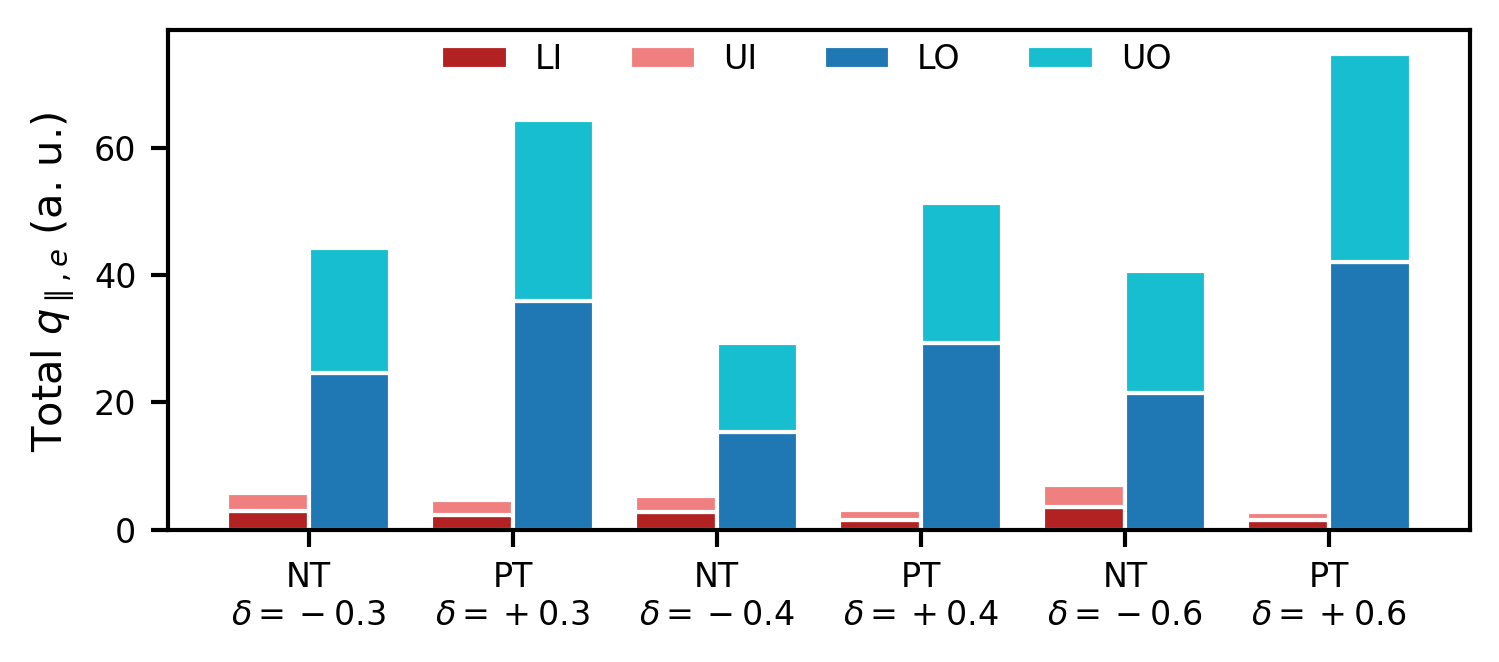

In [48]:
# Colors for each category
colors = ['tab:blue', 'tab:cyan', 'firebrick', 'lightcoral']

# Creating the figure and axes


fig, ax = plt.subplots(ncols=1, figsize=(1.6*fig_width, fig_height))


# Bar positions and width
bar_width = 0.4
index = np.arange(6)  # Positions for DNT and DPT

# Function to plot stacked bars
def plot_stacked_bars(index, heat_values, colors, labels):
    bottom = 0
    for value, color in zip(heat_values, colors):
        plt.bar(index, value, bottom=bottom, color=color, width=bar_width, edgecolor='white', label=labels[heat_values.index(value)])
        bottom += value

# Grouping the heat values for DNT and DPT
heat_DNT_dn0p3_outer = [Heat_DNT_dn0p3_LO, Heat_DNT_dn0p3_UO]
heat_DNT_dn0p3_inner = [Heat_DNT_dn0p3_LI, Heat_DNT_dn0p3_UI]
heat_DNT_dn0p4_outer = [Heat_DNT_dn0p4_LO, Heat_DNT_dn0p4_UO]
heat_DNT_dn0p4_inner = [Heat_DNT_dn0p4_LI, Heat_DNT_dn0p4_UI]
heat_DNT_dn0p6_outer = [Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO]
heat_DNT_dn0p6_inner = [Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI]


heat_DPT_d0p3_outer = [Heat_DPT_d0p3_LO, Heat_DPT_d0p3_UO]
heat_DPT_d0p3_inner = [Heat_DPT_d0p3_LI, Heat_DPT_d0p3_UI]
heat_DPT_d0p4_outer = [Heat_DPT_d0p4_LO, Heat_DPT_d0p4_UO]
heat_DPT_d0p4_inner = [Heat_DPT_d0p4_LI, Heat_DPT_d0p4_UI]
#heat_DPT_d0p5_outer = [Heat_DPT_d0p5_LO, Heat_DPT_d0p5_UO]
#heat_DPT_d0p5_inner = [Heat_DPT_d0p5_LI, Heat_DPT_d0p5_UI]
heat_DPT_d0p6_outer = [Heat_DPT_d0p6_LO, Heat_DPT_d0p6_UO]
heat_DPT_d0p6_inner = [Heat_DPT_d0p6_LI, Heat_DPT_d0p6_UI]

# Labels for the legend
labels = ['LO', 'UO', 'LI', 'UI']

# Plotting stacked bars for DNT and DPT

plot_stacked_bars(index[0] - bar_width/2, heat_DNT_dn0p3_inner, colors[2:], labels[2:])
plot_stacked_bars(index[0] + bar_width/2, heat_DNT_dn0p3_outer, colors[:2], labels[:2])

plot_stacked_bars(index[1] - bar_width/2, heat_DPT_d0p3_inner, colors[2:], labels[2:])
plot_stacked_bars(index[1] + bar_width/2, heat_DPT_d0p3_outer, colors[:2], labels[:2])

plot_stacked_bars(index[2] - bar_width/2, heat_DNT_dn0p4_inner, colors[2:], labels[2:])
plot_stacked_bars(index[2] + bar_width/2, heat_DNT_dn0p4_outer, colors[:2], labels[:2])

plot_stacked_bars(index[3] - bar_width/2, heat_DPT_d0p4_inner, colors[2:], labels[2:])
plot_stacked_bars(index[3] + bar_width/2, heat_DPT_d0p4_outer, colors[:2], labels[:2])

#plot_stacked_bars(index[4] - bar_width/2, heat_DNT_dn0p5_inner, colors[2:], labels[2:])
#plot_stacked_bars(index[4] + bar_width/2, heat_DNT_dn0p5_outer, colors[:2], labels[:2])

#plot_stacked_bars(index[5] - bar_width/2, heat_DPT_d0p5_inner, colors[2:], labels[2:])
#plot_stacked_bars(index[5] + bar_width/2, heat_DPT_d0p5_outer, colors[:2], labels[:2])


plot_stacked_bars(index[4] - bar_width/2, heat_DNT_dn0p6_inner, colors[2:], labels[2:])
plot_stacked_bars(index[4] + bar_width/2, heat_DNT_dn0p6_outer, colors[:2], labels[:2])

plot_stacked_bars(index[5] - bar_width/2, heat_DPT_d0p6_inner, colors[2:], labels[2:])
plot_stacked_bars(index[5] + bar_width/2, heat_DPT_d0p6_outer, colors[:2], labels[:2])

# Adding titles and labels
#plt.title('Total Heat Distribution in DNT and DPT Regions')
plt.ylabel(r'Total $q_{\parallel, e}$ (a. u.) ')

#plt.xticks(index, ['NT\n$\delta=-0.3$', 'PT\n$\delta=+0.3$', 'NT\n$\delta=-0.4$', 'PT\n$\delta=+0.4$', 
#                   'NT\n$\delta=-0.5$', 'PT\n$\delta=+0.5$', 'NT\n$\delta=-0.6$','PT\n$\delta=+0.6$'])
plt.xticks(index, ['NT\n$\delta=-0.3$', 'PT\n$\delta=+0.3$', 'NT\n$\delta=-0.4$', 'PT\n$\delta=+0.4$', 
                'NT\n$\delta=-0.6$','PT\n$\delta=+0.6$'])

# Adding a legend to explain the colors
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), title='Heat Categories', bbox_to_anchor=(0.5, 1), loc='upper left')
# Adjusting the legend to display horizontally
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.2, 1), 
           loc='upper left', ncol=len(by_label.keys()), borderaxespad=0., framealpha=0)


# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("qpar_bar_graph.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

Text(0.5, 1.0, '$q_{\\parallel e}$ in PT')

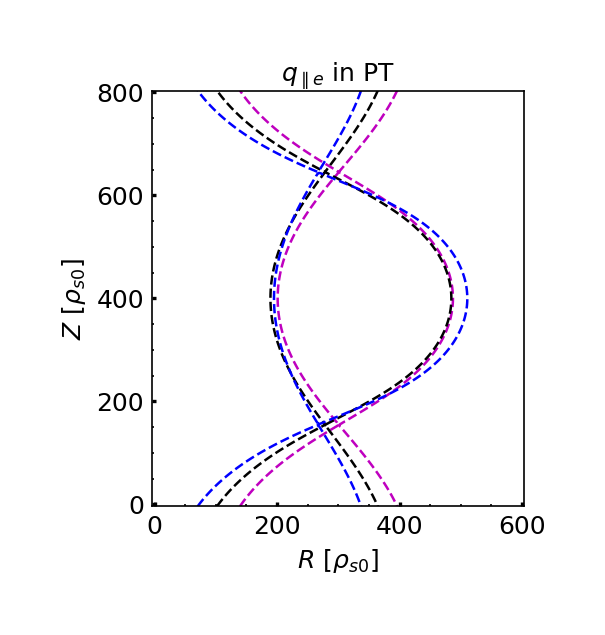

In [57]:
           
fig, ax = plt.subplots(figsize=(0.8,0.9), dpi=600)
X,Y = np.meshgrid(s.x, s.y)


ax.contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], colors='m', linewidths=0.3, linestyles='--')
ax.contour(X, Y, Psi_PT_d0p4, levels=[Psi_PT_d0p4[iyxpt_PT_d0p4, ixxpt_PT_d0p4]], colors='k', linewidths=0.3, linestyles='--')

ax.contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='b', linewidths=0.3, linestyles='--')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
ax.tick_params(which='major', direction="in", size=0.5, width=0.4)
ax.tick_params(axis='x', labelsize=3, pad=1)
ax.tick_params(axis='y', labelsize=3, pad=1)
ax.yaxis.get_offset_text().set_fontsize(2.5)
ax.set_xticks([0, 200, 400, 600])  # Set the positions of the x-axis ticks
ax.set_xlabel(r'$R\,\,[\rho_{s0}]$', fontsize=3, labelpad=1)
ax.set_ylabel(r'$Z\,\,[\rho_{s0}]$', fontsize=3, rotation=90, labelpad=1)

ax.spines["bottom"].set_linewidth(0.2)
ax.spines["left"].set_linewidth(0.2)
ax.spines["right"].set_linewidth(0.2)
ax.spines["top"].set_linewidth(0.2)

ax.text(410, 80, 'LO', style ='normal', family='sans-serif', fontsize = 3, color ="w")
ax.text(120, 100, 'LI', style ='normal', family='sans-serif', fontsize = 3, color ="w")
ax.text(410, 690, 'UO', style ='normal', family='sans-serif', fontsize = 3, color ="w")
ax.text(120, 650, 'UI', style ='normal', family='sans-serif', fontsize = 3, color ="w")

#ax.set_title(r'$\delta=+0.6$', fontsize=3, pad=1)
ax.set_title(r'$q_{\parallel e}$ in PT', fontsize=3, pad=1)

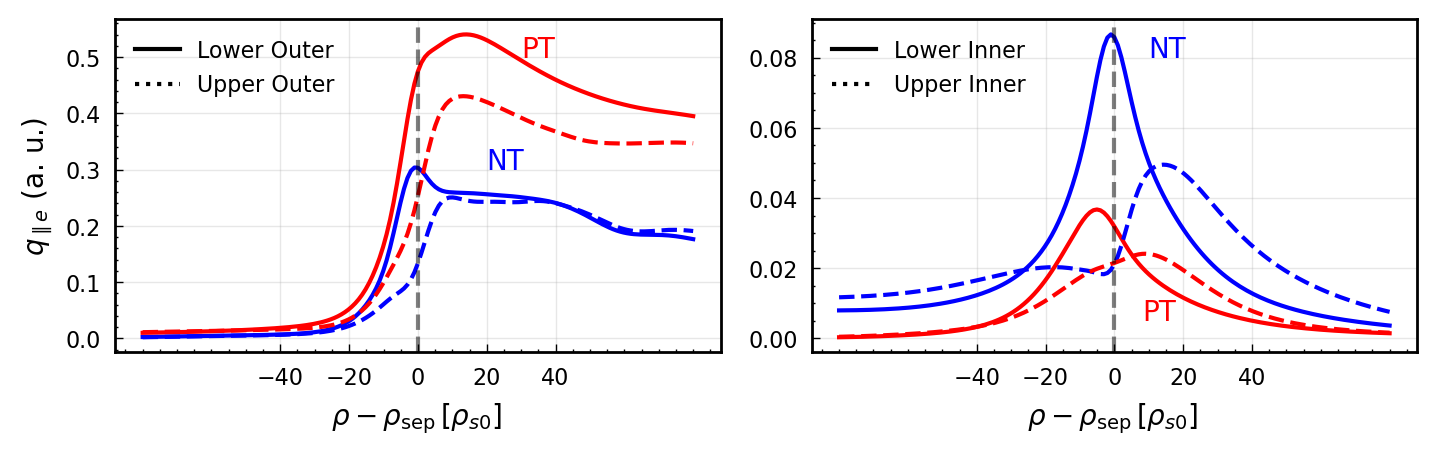

In [50]:

#fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(2.4*fig_width, 2*1.6*fig_height), sharex=True, 
#                         sharey=True, dpi=100)

fig, axes = plt.subplots(ncols=2, figsize=(2.4*fig_width, fig_height), dpi=200)
plt.subplots_adjust(wspace=0.15)  # Adjust the width space

X, Y = np.meshgrid(s.x, s.y)
axes[0].plot(length_LO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LO), label=r"Lower Outer", c='b')
axes[0].plot(length_LO_DPT_d0p6, np.abs(qpare_DPT_d0p6_LO),  c='r')

axes[0].plot(length_UO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UO), label=r"Upper Outer", c='b', ls='--')
axes[0].plot(length_UO_DPT_d0p6, np.abs(qpare_DPT_d0p6_UO), c='r', ls='--')

axes[1].plot(length_LI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LI), label=r"Lower Inner", c='b')
axes[1].plot(length_LI_DPT_d0p6, np.abs(qpare_DPT_d0p6_LI),  c='r')

axes[1].plot(length_UI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UI), label=r"Upper Inner", c='b', ls='--')
axes[1].plot(length_UI_DPT_d0p6, np.abs(qpare_DPT_d0p6_UI), c='r', ls='--')


for ax in axes:
    ax.axvline(x=0, c='k', ls='--', alpha=0.5)
    ax.set_xlabel(r'$\rho-\rho_{\rm{sep}} \, [\rho_{s0}]$ ')
    #ax.set_title(r'$\delta = \pm 0.6$')


for ax in axes:
    ax.grid(True, which='major', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.grid(True, which='minor', alpha=0, linestyle='-', linewidth=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=1, width=0.5, pad=5)
    ax.tick_params(which='major', direction="in", size=3, width=0.5, pad=5)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    #ax.set_xlabel(r'$(r-r_{{sep}})$', rotation=0, size=5, labelpad=1)
    #ax.set_xlabel(r'R$\,[\rho_{s0}]$', rotation=0, size=14, labelpad=8)
    #ax.set_ylabel(r'$n$', rotation=90, size=3, labelpad=1)
    #ax.yaxis.get_offset_text().set_fontsize()
    # Figure edge setting
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["top"].set_linewidth(1)
    #ax.set_xlim([450, 495])
    #ax.set_ylim([0.1, 1.7])
    #ax.axvline(x=470, lw=1, c='k', ls='--')
    ax.set_xticks(np.arange(-40, 41, 20))
    
    
    
axes[0].set_ylabel(r'$q_{\parallel e}$ (a. u.)')

axes[0].text(x=30, y=0.5, s='PT', color='r')
axes[0].text(x=20, y=0.3, s='NT', color='b')

axes[1].text(x=8, y=0.005, s='PT', color='r')
axes[1].text(x=10, y=0.08, s='NT', color='b')


custom_handles = [
    mlines.Line2D([], [], color='k', label='Lower Outer'),  
    mlines.Line2D([], [], color='k', linestyle=':', label='Upper Outer'),  
]

custom_handles_inner = [
    mlines.Line2D([], [], color='k', label='Lower Inner'),  
    mlines.Line2D([], [], color='k', linestyle=':', label='Upper Inner'),  
]

# Apply custom legend handles to the first axes
axes[0].legend(handles=custom_handles, bbox_to_anchor=(0.0, 1.), loc='upper left', edgecolor='white', facecolor='white', framealpha=0)
axes[1].legend(handles=custom_handles_inner, bbox_to_anchor=(0.0, 1.), loc='upper left', edgecolor='white', facecolor='white', framealpha=0)


# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("qpar_profile.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Power distributoin in percantage </b></span><br>
</div>

In [183]:
Tot_qasym_outer = np.abs(data_LO - data_UO)
Peak_qasym_outer = np.abs(peak_LO - peak_UO)


Tot_inner = data_LI + data_UI
Peak_inner = peak_LI + peak_UI

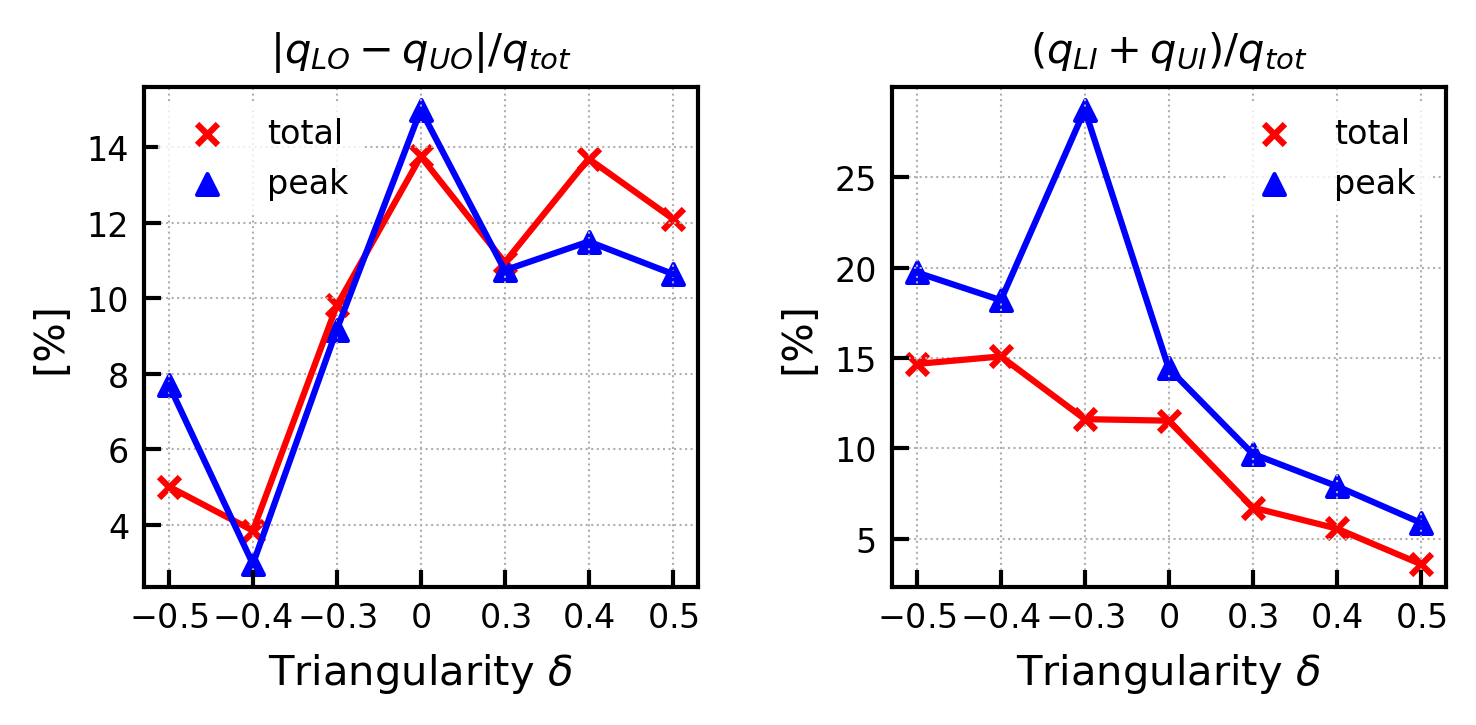

In [121]:
fig, axes=plt.subplots(ncols=2, figsize=(1.6*fig_width, fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$', r'$0.3$', r'$0.4$',  r'$0.5$']



axes[0].scatter(xlabels, Tot_qasym_outer, c='r', marker='x', label='total')
axes[0].plot(xlabels, Tot_qasym_outer, c='r')

axes[0].scatter(xlabels, Peak_qasym_outer, c='b', marker='^', label='peak')
axes[0].plot(xlabels, Peak_qasym_outer, c='b')
axes[0].set_xlabel(r'Triangularity $\delta$')
axes[0].set_ylabel(r'[%]')
axes[0].set_title(r'$|q_{LO}-q_{UO}|/q_{tot}$')

axes[1].scatter(xlabels, Tot_inner, c='r', marker='x', label='total')
axes[1].plot(xlabels, Tot_inner, c='r')

axes[1].scatter(xlabels, Peak_inner, c='b', marker='^', label='peak')
axes[1].plot(xlabels, Peak_inner, c='b')
axes[1].set_xlabel(r'Triangularity $\delta$')
axes[1].set_ylabel(r'[%]')
axes[1].set_title(r'$(q_{LI}+q_{UI})/q_{tot}$')

for ax in axes:
    ax.grid(True, which='major', lw=0.5)
    ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
    ax.tick_params(which='major', direction="in")
    ax.tick_params(which='minor', direction="in")
    
axes[0].legend()
axes[1].legend()


In [156]:
#Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO, Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI


Pin_Pout_dn0p3 = (Heat_DNT_dn0p3_LI + Heat_DNT_dn0p3_UI) / (Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_UO)
Pin_Pout_dn0p4 = (Heat_DNT_dn0p4_LI + Heat_DNT_dn0p4_UI) / (Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_UO)
Pin_Pout_dn0p6 = (Heat_DNT_dn0p6_LI + Heat_DNT_dn0p6_UI) / (Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_UO)
Pin_Pout_DN = (Heat_DN_LI + Heat_DN_UI) / (Heat_DN_LO + Heat_DN_UO)


Pin_Pout_d0p3 = (Heat_DPT_d0p3_LI + Heat_DPT_d0p3_UI) / (Heat_DPT_d0p3_LO + Heat_DPT_d0p3_UO)
Pin_Pout_d0p4 = (Heat_DPT_d0p4_LI + Heat_DPT_d0p4_UI) / (Heat_DPT_d0p4_LO + Heat_DPT_d0p4_UO)
Pin_Pout_d0p6 = (Heat_DPT_d0p6_LI + Heat_DPT_d0p6_UI) / (Heat_DPT_d0p6_LO + Heat_DPT_d0p6_UO)

Pin_Pout = []
Pin_Pout.append(Pin_Pout_dn0p6)
Pin_Pout.append(Pin_Pout_dn0p4)
Pin_Pout.append(Pin_Pout_dn0p3)
Pin_Pout.append(Pin_Pout_DN)
Pin_Pout.append(Pin_Pout_d0p3)
Pin_Pout.append(Pin_Pout_d0p4)
Pin_Pout.append(Pin_Pout_d0p6)


In [157]:
Pup_Pdown_dn0p3 = (Heat_DNT_dn0p3_UO + Heat_DNT_dn0p3_UI) / (Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_LI)
Pup_Pdown_dn0p4 = (Heat_DNT_dn0p4_UO + Heat_DNT_dn0p4_UI) / (Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_LI)
Pup_Pdown_dn0p6 = (Heat_DNT_dn0p6_UO + Heat_DNT_dn0p6_UI) / (Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_LI)
Pup_Pdown_DN = (Heat_DN_UO + Heat_DN_UI) / (Heat_DN_LO + Heat_DN_LI)


Pup_Pdown_d0p3 = (Heat_DPT_d0p3_UO + Heat_DPT_d0p3_UI) / (Heat_DPT_d0p3_LO + Heat_DPT_d0p3_LI)
Pup_Pdown_d0p4 = (Heat_DPT_d0p4_UO + Heat_DPT_d0p4_UI) / (Heat_DPT_d0p4_LO + Heat_DPT_d0p4_LI)
Pup_Pdown_d0p6 = (Heat_DPT_d0p6_UO + Heat_DPT_d0p6_UI) / (Heat_DPT_d0p6_LO + Heat_DPT_d0p6_LI)

Pup_Pdown = []
Pup_Pdown.append(Pup_Pdown_dn0p6)
Pup_Pdown.append(Pup_Pdown_dn0p4)
Pup_Pdown.append(Pup_Pdown_dn0p3)
Pup_Pdown.append(Pup_Pdown_DN)

Pup_Pdown.append(Pup_Pdown_d0p3)
Pup_Pdown.append(Pup_Pdown_d0p4)
Pup_Pdown.append(Pup_Pdown_d0p6)


In [158]:
Pup_Ptot_dn0p3 = (Heat_DNT_dn0p3_UO + Heat_DNT_dn0p3_UI) / (Heat_tot_DNT_dn0p3)
Pup_Ptot_dn0p4 = (Heat_DNT_dn0p4_UO + Heat_DNT_dn0p4_UI) / (Heat_tot_DNT_dn0p4)
Pup_Ptot_dn0p6 = (Heat_DNT_dn0p6_UO + Heat_DNT_dn0p6_UI) / (Heat_tot_DNT_dn0p6)
Pup_Ptot_DN = (Heat_DN_UO + Heat_DN_UI) / (Heat_tot_DN)


Pup_Ptot_d0p3 = (Heat_DPT_d0p3_UO + Heat_DPT_d0p3_UI) / (Heat_tot_DPT_d0p3)
Pup_Ptot_d0p4 = (Heat_DPT_d0p4_UO + Heat_DPT_d0p4_UI) / (Heat_tot_DPT_d0p4)
Pup_Ptot_d0p6 = (Heat_DPT_d0p6_UO + Heat_DPT_d0p6_UI) / (Heat_tot_DPT_d0p6)

Pup_Ptot = []
Pup_Ptot.append(Pup_Ptot_dn0p6)
Pup_Ptot.append(Pup_Ptot_dn0p4)
Pup_Ptot.append(Pup_Ptot_dn0p3)
Pup_Ptot.append(Pup_Ptot_DN)

Pup_Ptot.append(Pup_Ptot_d0p3)
Pup_Ptot.append(Pup_Ptot_d0p4)
Pup_Ptot.append(Pup_Ptot_d0p6)


In [159]:
Pdown_Ptot_dn0p3 = (Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_LI) / (Heat_tot_DNT_dn0p3)
Pdown_Ptot_dn0p4 = (Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_LI) / (Heat_tot_DNT_dn0p4)
Pdown_Ptot_dn0p6 = (Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_LI) / (Heat_tot_DNT_dn0p6)
Pdown_Ptot_DN = (Heat_DN_LO + Heat_DN_LI) / (Heat_tot_DN)


Pdown_Ptot_d0p3 = (Heat_DPT_d0p3_LO + Heat_DPT_d0p3_LI) / (Heat_tot_DPT_d0p3)
Pdown_Ptot_d0p4 = (Heat_DPT_d0p4_LO + Heat_DPT_d0p4_LI) / (Heat_tot_DPT_d0p4)
Pdown_Ptot_d0p6 = (Heat_DPT_d0p6_LO + Heat_DPT_d0p6_LI) / (Heat_tot_DPT_d0p6)

Pdown_Ptot = []
Pdown_Ptot.append(Pdown_Ptot_dn0p6)
Pdown_Ptot.append(Pdown_Ptot_dn0p4)
Pdown_Ptot.append(Pdown_Ptot_dn0p3)
Pdown_Ptot.append(Pdown_Ptot_DN)

Pdown_Ptot.append(Pdown_Ptot_d0p3)
Pdown_Ptot.append(Pdown_Ptot_d0p4)
Pdown_Ptot.append(Pdown_Ptot_d0p6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


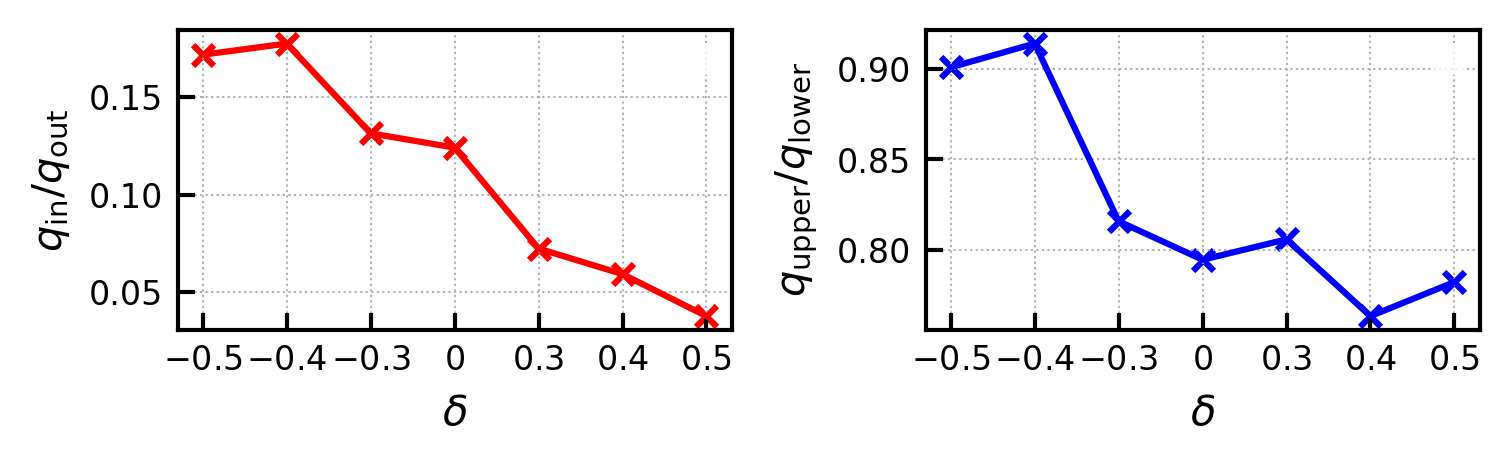

In [160]:
fig, axes=plt.subplots(ncols=2, figsize=(1.6*fig_width, 0.6*fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$',r'$0.3$', r'$0.4$',  r'$0.5$']



axes[0].scatter(xlabels, Pin_Pout, c='r', marker='x')
axes[0].plot(xlabels, Pin_Pout, c='r')

axes[0].set_xlabel(r'$\delta$')
axes[0].set_ylabel(r'$q_{\rm{in}}/q_{\rm{out}}$')
#axes[0].set_title(r'$q_{\rm{in}}/q_{\rm{out}}$')

axes[1].scatter(xlabels, Pup_Pdown, c='b', marker='x')
axes[1].plot(xlabels, Pup_Pdown, c='b')

#axes[1].scatter(xlabels, Peak_inner, c='b', marker='^', label='peak')
#axes[1].plot(xlabels, Peak_inner, c='b')
axes[1].set_xlabel(r'$\delta$')
axes[1].set_ylabel(r'$q_{\rm{upper}}/q_{\rm{lower}}$')
#axes[1].set_title(r'$(q_{LI}+q_{UI})/q_{tot}$')

for ax in axes:
    ax.grid(True, which='major', lw=0.5)
    ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
    ax.tick_params(which='major', direction="in")
    ax.tick_params(which='minor', direction="in")
    
axes[0].legend()
axes[1].legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


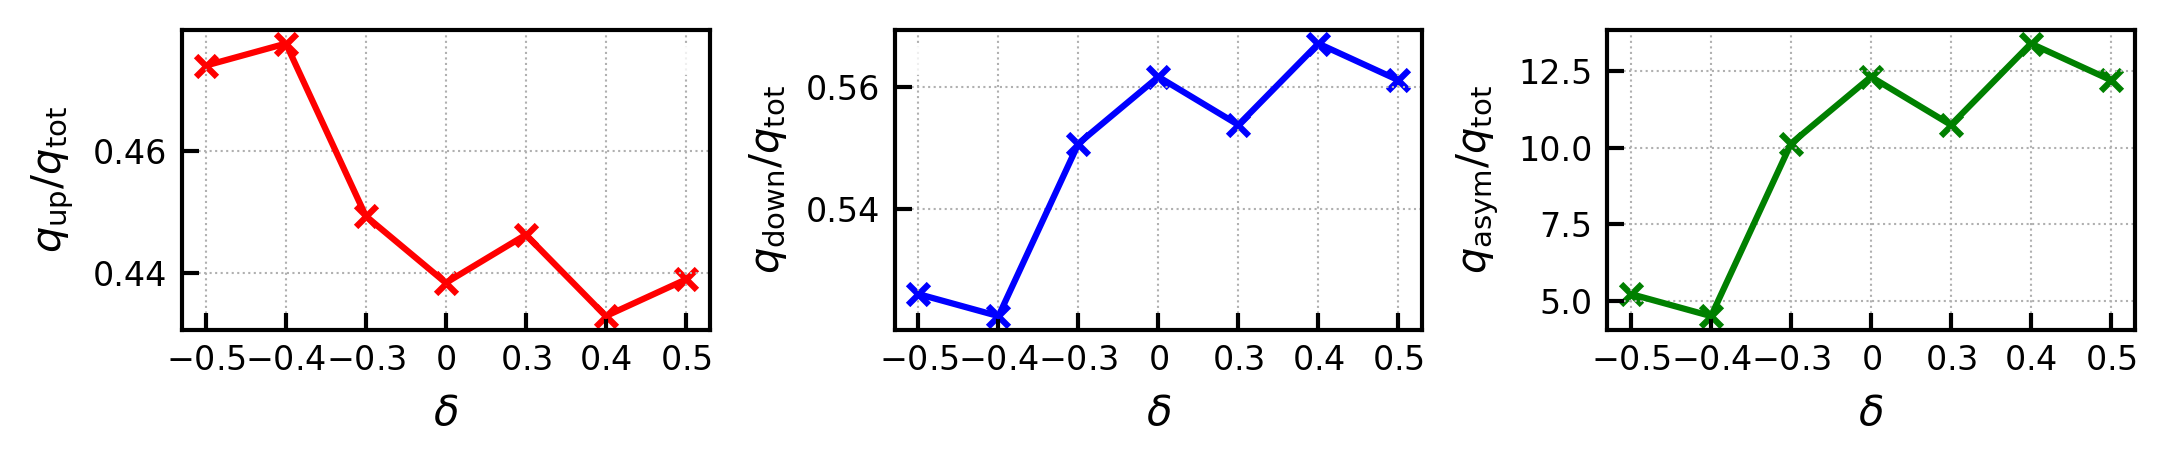

In [127]:
fig, axes=plt.subplots(ncols=3, figsize=(2.4*fig_width, 0.6*fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$',r'$0.3$', r'$0.4$',  r'$0.5$']



axes[0].scatter(xlabels, Pup_Ptot, c='r', marker='x')
axes[0].plot(xlabels, Pup_Ptot, c='r')

axes[0].set_xlabel(r'$\delta$')
axes[0].set_ylabel(r'$q_{\rm{up}}/q_{\rm{tot}}$')
#axes[0].set_title(r'$q_{\rm{in}}/q_{\rm{out}}$')

axes[1].scatter(xlabels, Pdown_Ptot, c='b', marker='x')
axes[1].plot(xlabels, Pdown_Ptot, c='b')

#axes[1].scatter(xlabels, Peak_inner, c='b', marker='^', label='peak')
#axes[1].plot(xlabels, Peak_inner, c='b')
axes[1].set_xlabel(r'$\delta$')
axes[1].set_ylabel(r'$q_{\rm{down}}/q_{\rm{tot}}$')
#axes[1].set_title(r'$(q_{LI}+q_{UI})/q_{tot}$')


axes[2].scatter(xlabels, np.abs(np.array(Pdown_Ptot)-np.array(Pup_Ptot))*100, c='g', marker='x')
axes[2].plot(xlabels, np.abs(np.array(Pdown_Ptot)-np.array(Pup_Ptot))*100, c='g')

#axes[1].scatter(xlabels, Peak_inner, c='b', marker='^', label='peak')
#axes[1].plot(xlabels, Peak_inner, c='b')
axes[2].set_xlabel(r'$\delta$')
axes[2].set_ylabel(r'$q_{\rm{asym}}/q_{\rm{tot}}$')
#axes[1].set_title(r'$(q_{LI}+q_{UI})/q_{tot}$')
for ax in axes:
    ax.grid(True, which='major', lw=0.5)
    ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
    ax.tick_params(which='major', direction="in")
    ax.tick_params(which='minor', direction="in")
    
axes[0].legend()
axes[1].legend()


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Figures for the paper </b></span><br>
</div>

In [168]:
#Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO, Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI


Heat_Pin_Pout_dn0p3 = (Heat_DNT_dn0p3_LI + Heat_DNT_dn0p3_UI) / (Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_UO)
Heat_Pin_Pout_dn0p4 = (Heat_DNT_dn0p4_LI + Heat_DNT_dn0p4_UI) / (Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_UO)
Heat_Pin_Pout_dn0p6 = (Heat_DNT_dn0p6_LI + Heat_DNT_dn0p6_UI) / (Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_UO)
Heat_Pin_Pout_DN = (Heat_DN_LI + Heat_DN_UI) / (Heat_DN_LO + Heat_DN_UO)


Heat_Pin_Pout_d0p3 = (Heat_DPT_d0p3_LI + Heat_DPT_d0p3_UI) / (Heat_DPT_d0p3_LO + Heat_DPT_d0p3_UO)
Heat_Pin_Pout_d0p4 = (Heat_DPT_d0p4_LI + Heat_DPT_d0p4_UI) / (Heat_DPT_d0p4_LO + Heat_DPT_d0p4_UO)
Heat_Pin_Pout_d0p6 = (Heat_DPT_d0p6_LI + Heat_DPT_d0p6_UI) / (Heat_DPT_d0p6_LO + Heat_DPT_d0p6_UO)

Heat_Pin_Pout = []
Heat_Pin_Pout.append(Heat_Pin_Pout_dn0p6)
Heat_Pin_Pout.append(Heat_Pin_Pout_dn0p4)
Heat_Pin_Pout.append(Heat_Pin_Pout_dn0p3)
Heat_Pin_Pout.append(Heat_Pin_Pout_DN)
Heat_Pin_Pout.append(Heat_Pin_Pout_d0p3)
Heat_Pin_Pout.append(Heat_Pin_Pout_d0p4)
Heat_Pin_Pout.append(Heat_Pin_Pout_d0p6)

# For peak 
Peak_Pin_Pout_dn0p3 = (Peak_DNT_dn0p3_LI + Peak_DNT_dn0p3_UI) / (Peak_DNT_dn0p3_LO + Peak_DNT_dn0p3_UO)
Peak_Pin_Pout_dn0p4 = (Peak_DNT_dn0p4_LI + Peak_DNT_dn0p4_UI) / (Peak_DNT_dn0p4_LO + Peak_DNT_dn0p4_UO)
Peak_Pin_Pout_dn0p6 = (Peak_DNT_dn0p6_LI + Peak_DNT_dn0p6_UI) / (Peak_DNT_dn0p6_LO + Peak_DNT_dn0p6_UO)
Peak_Pin_Pout_DN = (Peak_DN_LI + Peak_DN_UI) / (Peak_DN_LO + Peak_DN_UO)


Peak_Pin_Pout_d0p3 = (Peak_DPT_d0p3_LI + Peak_DPT_d0p3_UI) / (Peak_DPT_d0p3_LO + Peak_DPT_d0p3_UO)
Peak_Pin_Pout_d0p4 = (Peak_DPT_d0p4_LI + Peak_DPT_d0p4_UI) / (Peak_DPT_d0p4_LO + Peak_DPT_d0p4_UO)
Peak_Pin_Pout_d0p6 = (Peak_DPT_d0p6_LI + Peak_DPT_d0p6_UI) / (Peak_DPT_d0p6_LO + Peak_DPT_d0p6_UO)

Peak_Pin_Pout = []
Peak_Pin_Pout.append(Peak_Pin_Pout_dn0p6)
Peak_Pin_Pout.append(Peak_Pin_Pout_dn0p4)
Peak_Pin_Pout.append(Peak_Pin_Pout_dn0p3)
Peak_Pin_Pout.append(Peak_Pin_Pout_DN)
Peak_Pin_Pout.append(Peak_Pin_Pout_d0p3)
Peak_Pin_Pout.append(Peak_Pin_Pout_d0p4)
Peak_Pin_Pout.append(Peak_Pin_Pout_d0p6)


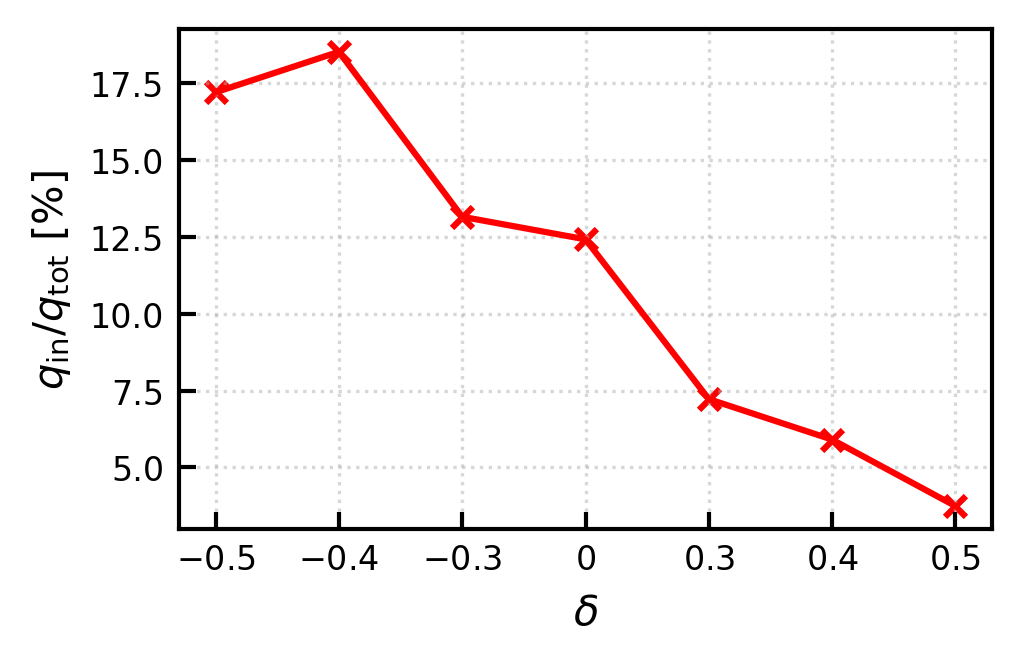

In [171]:
fig, axes=plt.subplots(figsize=(fig_width, fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$', r'$0.3$', r'$0.4$',  r'$0.5$']



axes.scatter(xlabels, np.array(Heat_Pin_Pout)*100, c='r', marker='x')
axes.plot(xlabels, np.array(Heat_Pin_Pout)*100, c='r')

#axes.scatter(xlabels, Peak_Pin_Pout, c='b', marker='^', label='peak')
#axes.plot(xlabels, Peak_Pin_Pout, c='b')
axes.set_xlabel(r'$\delta$')
axes.set_ylabel(r'$q_{\rm{in}}/q_{\rm{tot}}$ [%]')
#axes.set_title(r'$|q_{LO}-q_{UO}|/q_{tot}$')


#axes.grid(True, which='major', lw=0.5)
#axes.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
axes.grid(True)
axes.tick_params(which='major', direction="in")
axes.tick_params(which='minor', direction="in")

In [172]:
# Heat

Heat_Pup_Pdown_dn0p3 = (Heat_DNT_dn0p3_UO + Heat_DNT_dn0p3_UI) / (Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_LI)
Heat_Pup_Pdown_dn0p4 = (Heat_DNT_dn0p4_UO + Heat_DNT_dn0p4_UI) / (Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_LI)
Heat_Pup_Pdown_dn0p6 = (Heat_DNT_dn0p6_UO + Heat_DNT_dn0p6_UI) / (Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_LI)
Heat_Pup_Pdown_DN = (Heat_DN_UO + Heat_DN_UI) / (Heat_DN_LO + Heat_DN_LI)


Heat_Pup_Pdown_d0p3 = (Heat_DPT_d0p3_UO + Heat_DPT_d0p3_UI) / (Heat_DPT_d0p3_LO + Heat_DPT_d0p3_LI)
Heat_Pup_Pdown_d0p4 = (Heat_DPT_d0p4_UO + Heat_DPT_d0p4_UI) / (Heat_DPT_d0p4_LO + Heat_DPT_d0p4_LI)
Heat_Pup_Pdown_d0p6 = (Heat_DPT_d0p6_UO + Heat_DPT_d0p6_UI) / (Heat_DPT_d0p6_LO + Heat_DPT_d0p6_LI)

Heat_Pup_Pdown = []
Heat_Pup_Pdown.append(Heat_Pup_Pdown_dn0p6)
Heat_Pup_Pdown.append(Heat_Pup_Pdown_dn0p4)
Heat_Pup_Pdown.append(Heat_Pup_Pdown_dn0p3)
Heat_Pup_Pdown.append(Heat_Pup_Pdown_DN)

Heat_Pup_Pdown.append(Heat_Pup_Pdown_d0p3)
Heat_Pup_Pdown.append(Heat_Pup_Pdown_d0p4)
Heat_Pup_Pdown.append(Heat_Pup_Pdown_d0p6)

# Peak

Peak_Pup_Pdown_dn0p3 = (Peak_DNT_dn0p3_UO + Peak_DNT_dn0p3_UI) / (Peak_DNT_dn0p3_LO + Peak_DNT_dn0p3_LI)
Peak_Pup_Pdown_dn0p4 = (Peak_DNT_dn0p4_UO + Peak_DNT_dn0p4_UI) / (Peak_DNT_dn0p4_LO + Peak_DNT_dn0p4_LI)
Peak_Pup_Pdown_dn0p6 = (Peak_DNT_dn0p6_UO + Peak_DNT_dn0p6_UI) / (Peak_DNT_dn0p6_LO + Peak_DNT_dn0p6_LI)
Peak_Pup_Pdown_DN = (Peak_DN_UO + Peak_DN_UI) / (Peak_DN_LO + Peak_DN_LI)


Peak_Pup_Pdown_d0p3 = (Peak_DPT_d0p3_UO + Peak_DPT_d0p3_UI) / (Peak_DPT_d0p3_LO + Peak_DPT_d0p3_LI)
Peak_Pup_Pdown_d0p4 = (Peak_DPT_d0p4_UO + Peak_DPT_d0p4_UI) / (Peak_DPT_d0p4_LO + Peak_DPT_d0p4_LI)
Peak_Pup_Pdown_d0p6 = (Peak_DPT_d0p6_UO + Peak_DPT_d0p6_UI) / (Peak_DPT_d0p6_LO + Peak_DPT_d0p6_LI)

Peak_Pup_Pdown = []
Peak_Pup_Pdown.append(Peak_Pup_Pdown_dn0p6)
Peak_Pup_Pdown.append(Peak_Pup_Pdown_dn0p4)
Peak_Pup_Pdown.append(Peak_Pup_Pdown_dn0p3)
Peak_Pup_Pdown.append(Peak_Pup_Pdown_DN)

Peak_Pup_Pdown.append(Peak_Pup_Pdown_d0p3)
Peak_Pup_Pdown.append(Peak_Pup_Pdown_d0p4)
Peak_Pup_Pdown.append(Peak_Pup_Pdown_d0p6)

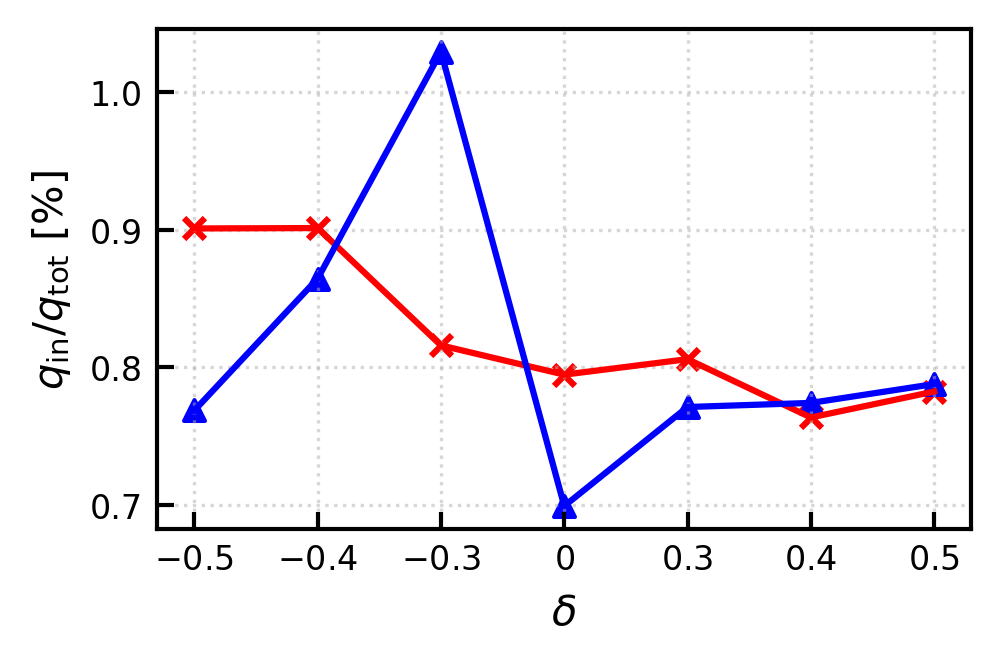

In [178]:
fig, axes=plt.subplots(figsize=(fig_width, fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$', r'$0.3$', r'$0.4$',  r'$0.5$']



axes.scatter(xlabels, np.array(Heat_Pup_Pdown), c='r', marker='x')
axes.plot(xlabels, np.array(Heat_Pup_Pdown), c='r')

axes.scatter(xlabels, Peak_Pup_Pdown, c='b', marker='^', label='peak')
axes.plot(xlabels, Peak_Pup_Pdown, c='b')
axes.set_xlabel(r'$\delta$')
axes.set_ylabel(r'$q_{\rm{in}}/q_{\rm{tot}}$ [%]')
#axes.set_title(r'$|q_{LO}-q_{UO}|/q_{tot}$')


#axes.grid(True, which='major', lw=0.5)
#axes.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
axes.grid(True)
axes.tick_params(which='major', direction="in")
axes.tick_params(which='minor', direction="in")

In [184]:
# Heat

Heat_Plower_Ptot_dn0p3 = (Heat_DNT_dn0p3_LO + Heat_DNT_dn0p3_LI) / (Heat_tot_DNT_dn0p3)
Heat_Plower_Ptot_dn0p4 = (Heat_DNT_dn0p4_LO + Heat_DNT_dn0p4_LI) / (Heat_tot_DNT_dn0p4)
Heat_Plower_Ptot_dn0p6 = (Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_LI) / (Heat_tot_DNT_dn0p6)
Heat_Plower_Ptot_DN = (Heat_DN_LO + Heat_DN_LI) / (Heat_tot_DN)


Heat_Plower_Ptot_d0p3 = (Heat_DPT_d0p3_LO + Heat_DPT_d0p3_LI) / (Heat_tot_DPT_d0p3)
Heat_Plower_Ptot_d0p4 = (Heat_DPT_d0p4_LO + Heat_DPT_d0p4_LI) / (Heat_tot_DPT_d0p4)
Heat_Plower_Ptot_d0p6 = (Heat_DPT_d0p6_LO + Heat_DPT_d0p6_LI) / (Heat_tot_DPT_d0p6)

Heat_Plower_Ptot = []
Heat_Plower_Ptot.append(Heat_Plower_Ptot_dn0p6)
Heat_Plower_Ptot.append(Heat_Plower_Ptot_dn0p4)
Heat_Plower_Ptot.append(Heat_Plower_Ptot_dn0p3)
Heat_Plower_Ptot.append(Heat_Plower_Ptot_DN)

Heat_Plower_Ptot.append(Heat_Plower_Ptot_d0p3)
Heat_Plower_Ptot.append(Heat_Plower_Ptot_d0p4)
Heat_Plower_Ptot.append(Heat_Plower_Ptot_d0p6)


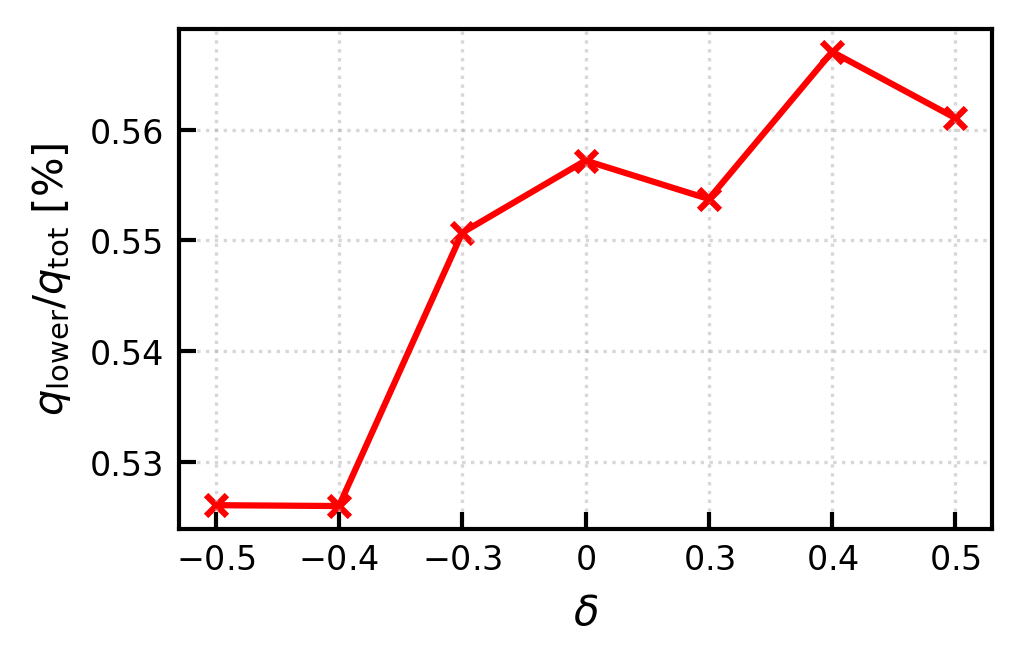

In [185]:
fig, axes=plt.subplots(figsize=(fig_width, fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$', r'$0.3$', r'$0.4$',  r'$0.5$']



axes.scatter(xlabels, np.array(Heat_Plower_Ptot), c='r', marker='x')
axes.plot(xlabels, np.array(Heat_Plower_Ptot), c='r')

#axes.scatter(xlabels, Peak_Pup_Pdown, c='b', marker='^', label='peak')
#axes.plot(xlabels, Peak_Pup_Pdown, c='b')
axes.set_xlabel(r'$\delta$')
axes.set_ylabel(r'$q_{\rm{lower}}/q_{\rm{tot}}$ [%]')
#axes.set_title(r'$|q_{LO}-q_{UO}|/q_{tot}$')


#axes.grid(True, which='major', lw=0.5)
#axes.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
axes.grid(True)
axes.tick_params(which='major', direction="in")
axes.tick_params(which='minor', direction="in")

In [186]:
# Heat

Heat_Pupper_Ptot_dn0p3 = (Heat_DNT_dn0p3_UO + Heat_DNT_dn0p3_UI) / (Heat_tot_DNT_dn0p3)
Heat_Pupper_Ptot_dn0p4 = (Heat_DNT_dn0p4_UO + Heat_DNT_dn0p4_UI) / (Heat_tot_DNT_dn0p4)
Heat_Pupper_Ptot_dn0p6 = (Heat_DNT_dn0p6_UO + Heat_DNT_dn0p6_UI) / (Heat_tot_DNT_dn0p6)
Heat_Pupper_Ptot_DN = (Heat_DN_UO + Heat_DN_UI) / (Heat_tot_DN)


Heat_Pupper_Ptot_d0p3 = (Heat_DPT_d0p3_UO + Heat_DPT_d0p3_UI) / (Heat_tot_DPT_d0p3)
Heat_Pupper_Ptot_d0p4 = (Heat_DPT_d0p4_UO + Heat_DPT_d0p4_UI) / (Heat_tot_DPT_d0p4)
Heat_Pupper_Ptot_d0p6 = (Heat_DPT_d0p6_UO + Heat_DPT_d0p6_UI) / (Heat_tot_DPT_d0p6)

Heat_Pupper_Ptot = []
Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_dn0p6)
Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_dn0p4)
Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_dn0p3)
Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_DN)

Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_d0p3)
Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_d0p4)
Heat_Pupper_Ptot.append(Heat_Pupper_Ptot_d0p6)


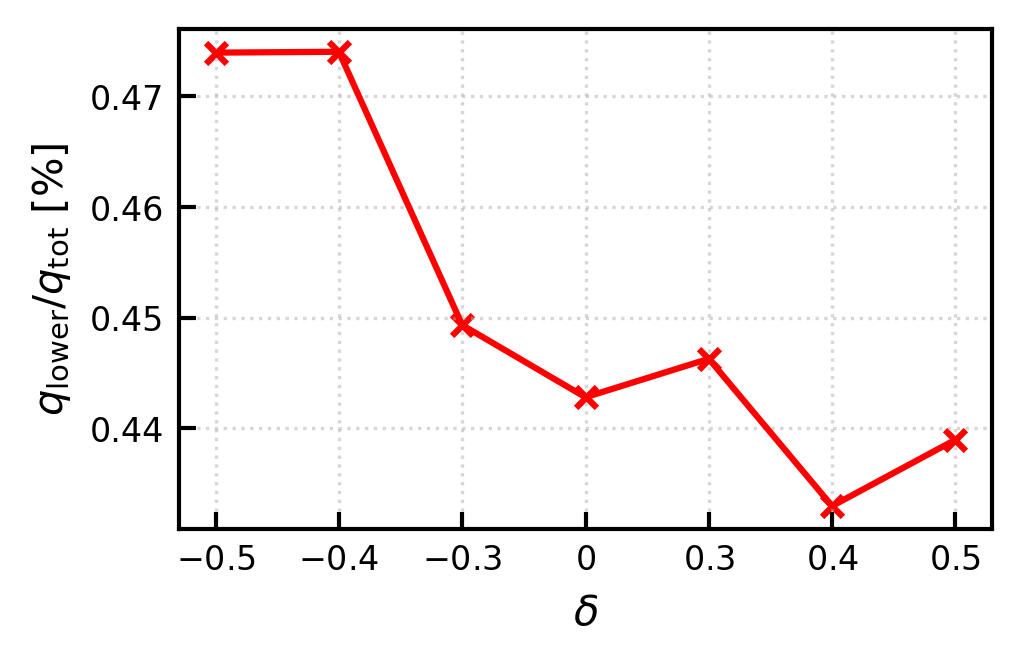

In [187]:
fig, axes=plt.subplots(figsize=(fig_width, fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$', r'$0.3$', r'$0.4$',  r'$0.5$']



axes.scatter(xlabels, np.array(Heat_Pupper_Ptot), c='r', marker='x')
axes.plot(xlabels, np.array(Heat_Pupper_Ptot), c='r')

#axes.scatter(xlabels, Peak_Pup_Pdown, c='b', marker='^', label='peak')
#axes.plot(xlabels, Peak_Pup_Pdown, c='b')
axes.set_xlabel(r'$\delta$')
axes.set_ylabel(r'$q_{\rm{lower}}/q_{\rm{tot}}$ [%]')
#axes.set_title(r'$|q_{LO}-q_{UO}|/q_{tot}$')


#axes.grid(True, which='major', lw=0.5)
#axes.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
axes.grid(True)
axes.tick_params(which='major', direction="in")
axes.tick_params(which='minor', direction="in")

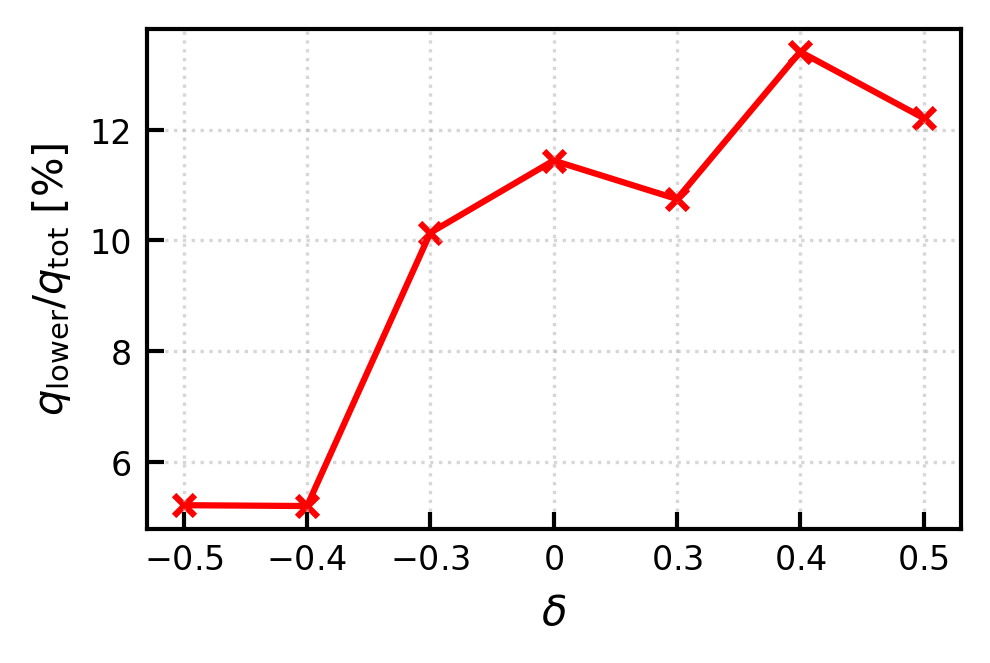

In [189]:
fig, axes=plt.subplots(figsize=(fig_width, fig_height))

xlabels = [r'$-0.5$', r'$-0.4$', r'$-0.3$', r'$0$', r'$0.3$', r'$0.4$',  r'$0.5$']



axes.scatter(xlabels, np.abs(np.array(Heat_Pupper_Ptot)-np.array(Heat_Plower_Ptot))*100, c='r', marker='x')
axes.plot(xlabels, np.abs(np.array(Heat_Pupper_Ptot)-np.array(Heat_Plower_Ptot))*100, c='r')

#axes.scatter(xlabels, Peak_Pup_Pdown, c='b', marker='^', label='peak')
#axes.plot(xlabels, Peak_Pup_Pdown, c='b')
axes.set_xlabel(r'$\delta$')
axes.set_ylabel(r'$q_{\rm{lower}}/q_{\rm{tot}}$ [%]')
#axes.set_title(r'$|q_{LO}-q_{UO}|/q_{tot}$')


#axes.grid(True, which='major', lw=0.5)
#axes.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
axes.grid(True)
axes.tick_params(which='major', direction="in")
axes.tick_params(which='minor', direction="in")